In [1]:
from common_utils import switch_graph, cr

In [3]:
graphs.OrthogonalArrayBlockGraph(2,2).adjacency_matrix()

[0 1 1 0]
[1 0 0 1]
[1 0 0 1]
[0 1 1 0]

In [4]:
cr(graphs.CompleteGraph(5))

'5\n  0   1   1   1   1 \n  1   0   1   1   1 \n  1   1   0   1   1 \n  1   1   1   0   1 \n  1   1   1   1   0 \nrank 2'

In [5]:
def delete_vertex(graph):
    new_graph = graph.copy()
    # removing the first vertex
    new_graph.delete_vertex(new_graph.vertices()[0])
    return new_graph

In [112]:
OA = graphs.OrthogonalArrayBlockGraph(2, 7)
switched_OA = switch_graph([OA.vertices()[0]], OA)        
result = cr(switched_OA)
results = result.split("\n")

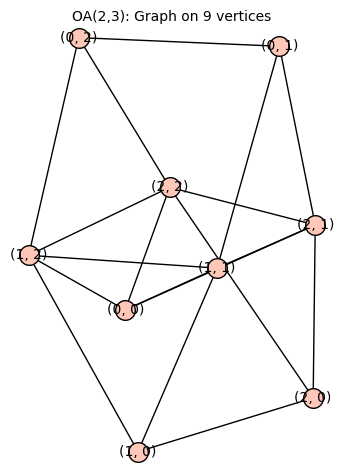

In [6]:
switch_graph([(0,0)], graphs.OrthogonalArrayBlockGraph(2, 3))

In [134]:
diags, matrix = results[1], results[3].split(" ")

In [135]:
c_configs = []

for i in range(int(results[0])):
    temp = []
    for j in range(int(results[0])):
        temp.append(int(matrix[i * int(results[0]) + j]))
    c_configs.append(temp)

c_configs

[[1, 8, 8, 8, 8, 8, 8, 8, 8, 13, 13, 13, 13, 13, 13],
 [7, 0, 11, 11, 11, 10, 3, 3, 3, 15, 15, 15, 5, 5, 5],
 [7, 11, 0, 11, 11, 3, 10, 3, 3, 15, 5, 5, 15, 15, 5],
 [7, 11, 11, 0, 11, 3, 3, 10, 3, 5, 15, 5, 15, 5, 15],
 [7, 11, 11, 11, 0, 3, 3, 3, 10, 5, 5, 15, 5, 15, 15],
 [7, 10, 3, 3, 3, 0, 11, 11, 11, 15, 15, 15, 5, 5, 5],
 [7, 3, 10, 3, 3, 11, 0, 11, 11, 15, 5, 5, 15, 15, 5],
 [7, 3, 3, 10, 3, 11, 11, 0, 11, 5, 15, 5, 15, 5, 15],
 [7, 3, 3, 3, 10, 11, 11, 11, 0, 5, 5, 15, 5, 15, 15],
 [12, 14, 14, 4, 4, 14, 14, 4, 4, 2, 9, 9, 9, 9, 6],
 [12, 14, 4, 14, 4, 14, 4, 14, 4, 9, 2, 9, 9, 6, 9],
 [12, 14, 4, 4, 14, 14, 4, 4, 14, 9, 9, 2, 6, 9, 9],
 [12, 4, 14, 14, 4, 4, 14, 14, 4, 9, 9, 6, 2, 9, 9],
 [12, 4, 14, 4, 14, 4, 14, 4, 14, 9, 6, 9, 9, 2, 9],
 [12, 4, 4, 14, 14, 4, 4, 14, 14, 6, 9, 9, 9, 9, 2]]

In [136]:
diags = diags.split(" ")[:-1]
for i in range(len(diags)):
    diags[i] = int(diags[i])
l = diags
L = [ (l[i], i) for i in range(len(l)) ]

L.sort()
sorted_diag, perm = zip(*L)

In [133]:
g = graphs.CompleteGraph(6)
h = g.line_graph(labels=False)

switched_tri_graph = switch_graph([h.vertices()[0]], h)
result = cr(switched_tri_graph)
results = result.split("\n")

In [137]:
sorted_diag

(0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2)

In [138]:
perm

(1, 2, 3, 4, 5, 6, 7, 8, 0, 9, 10, 11, 12, 13, 14)

In [139]:
import numpy as np

def permutation_matrix(permutation):
    n = len(permutation)
    matrix = np.zeros((n, n), dtype=int)
    
    # Place 1s according to the permutation list
    for i, row_index in enumerate(permutation):
        matrix[i, row_index] = 1
    
    return matrix

perm_matrix = permutation_matrix(perm)

In [140]:

c_matrix=np.array([np.array(xi) for xi in c_configs])


In [141]:
sorted_matrix = np.matmul(np.matmul(perm_matrix, c_matrix), np.transpose(perm_matrix))

In [36]:
def make_c(n):
    res = []
    for i in range(2 * n):
        tmp = []
        if i < n:
            for j in range(n**2):
                    if (j - i) % n == 0:
                        tmp.append(1)
                    else:
                        tmp.append(0)
        else:
            tmp = ([0] * n * (i - n)) + ([1] * n) + ([0] * n * (2*n - 1 - i))
                
        res.append(tmp)
    return Matrix(res)

In [12]:
graphs.RookGraph([3,3]).adjacency_matrix()

[0 1 1 1 0 0 1 0 0]
[1 0 1 0 1 0 0 1 0]
[1 1 0 0 0 1 0 0 1]
[1 0 0 0 1 1 1 0 0]
[0 1 0 1 0 1 0 1 0]
[0 0 1 1 1 0 0 0 1]
[1 0 0 1 0 0 0 1 1]
[0 1 0 0 1 0 1 0 1]
[0 0 1 0 0 1 1 1 0]

In [41]:
c = make_c(5)
m = c.T * c
print(m.str())

[2 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
[1 2 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0]
[1 1 2 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
[1 1 1 2 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0]
[1 1 1 1 2 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]
[1 0 0 0 0 2 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
[0 1 0 0 0 1 2 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 2 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
[0 0 0 1 0 1 1 1 2 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0]
[0 0 0 0 1 1 1 1 1 2 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]
[1 0 0 0 0 1 0 0 0 0 2 1 1 1 1 1 0 0 0 0 1 0 0 0 0]
[0 1 0 0 0 0 1 0 0 0 1 2 1 1 1 0 1 0 0 0 0 1 0 0 0]
[0 0 1 0 0 0 0 1 0 0 1 1 2 1 1 0 0 1 0 0 0 0 1 0 0]
[0 0 0 1 0 0 0 0 1 0 1 1 1 2 1 0 0 0 1 0 0 0 0 1 0]
[0 0 0 0 1 0 0 0 0 1 1 1 1 1 2 0 0 0 0 1 0 0 0 0 1]
[1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 2 1 1 1 1 1 0 0 0 0]
[0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 2 1 1 1 0 1 0 0 0]
[0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 2 1 1 0 0 1 0 0]
[0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 2 1 0 0 0 1 0]
[0 0 0 0 1 0

In [9]:
c = Matrix([
    [1,0,0,1,0,0,1,0,0],
    [0,1,0,0,1,0,0,1,0],
    [0,0,1,0,0,1,0,0,1],
    [1,1,1,0,0,0,0,0,0],
    [0,0,0,1,1,1,0,0,0],
    [0,0,0,0,0,0,1,1,1]
])
c.T * c

[2 1 1 1 0 0 1 0 0]
[1 2 1 0 1 0 0 1 0]
[1 1 2 0 0 1 0 0 1]
[1 0 0 2 1 1 1 0 0]
[0 1 0 1 2 1 0 1 0]
[0 0 1 1 1 2 0 0 1]
[1 0 0 1 0 0 2 1 1]
[0 1 0 0 1 0 1 2 1]
[0 0 1 0 0 1 1 1 2]

In [8]:
c2 = Matrix([
    [1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0],
    [0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0],
    [0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0],
    [0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1],
    [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1]
])
c2.T * c2

[2 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0]
[1 2 1 1 0 1 0 0 0 1 0 0 0 1 0 0]
[1 1 2 1 0 0 1 0 0 0 1 0 0 0 1 0]
[1 1 1 2 0 0 0 1 0 0 0 1 0 0 0 1]
[1 0 0 0 2 1 1 1 1 0 0 0 1 0 0 0]
[0 1 0 0 1 2 1 1 0 1 0 0 0 1 0 0]
[0 0 1 0 1 1 2 1 0 0 1 0 0 0 1 0]
[0 0 0 1 1 1 1 2 0 0 0 1 0 0 0 1]
[1 0 0 0 1 0 0 0 2 1 1 1 1 0 0 0]
[0 1 0 0 0 1 0 0 1 2 1 1 0 1 0 0]
[0 0 1 0 0 0 1 0 1 1 2 1 0 0 1 0]
[0 0 0 1 0 0 0 1 1 1 1 2 0 0 0 1]
[1 0 0 0 1 0 0 0 1 0 0 0 2 1 1 1]
[0 1 0 0 0 1 0 0 0 1 0 0 1 2 1 1]
[0 0 1 0 0 0 1 0 0 0 1 0 1 1 2 1]
[0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 2]

## Things to do
1. Create the type matrix function
   - just clean up until the permutation matrix part
   - apply it to adj matrix and config matrix
   - then from sorted config matrix, condense into the different blocks
2. Apply the whole thing to $OA(2, n)$ and $T(n)$ to observe
   - $OA(2, n)$ works because mostly CR = 15
   - $T(n)$ try to use $n$ = 6 and above since it converges to CR =  16
   - Try and see if the type matrices are all the same to show similarity

In [ ]:
OA = graphs.OrthogonalArrayBlockGraph(2, 7)
switched_OA = switch_graph([OA.vertices()[0]], OA)        
result = cr(switched_OA)
results = result.split("\n")
diags, matrix = results[1], results[3].split(" ")
config_matrix = []

for i in range(int(results[0])):
    temp = []
    for j in range(int(results[0])):
        temp.append(int(matrix[i * int(results[0]) + j]))
    config_matrix.append(temp)

config_matrix=np.array([np.array(xi) for xi in config_matrix])

diags = diags.split(" ")[:-1]
for i in range(len(diags)):
    diags[i] = int(diags[i])
l = diags
L = [ (l[i], i) for i in range(len(l)) ]

L.sort()
sorted_diag, perm = zip(*L)

import numpy as np

def permutation_matrix(permutation):
    n = len(permutation)
    matrix = np.zeros((n, n), dtype=int)
    
    # Place 1s according to the permutation list
    for i, row_index in enumerate(permutation):
        matrix[i, row_index] = 1
    
    return matrix

perm_matrix = permutation_matrix(perm)

sorted_matrix = np.matmul(np.matmul(perm_matrix, config_matrix), np.transpose(perm_matrix))

for r in sorted_matrix:
    for j in r:
        print(f"{j:<3}", end=' ')
    print()

### Below code does the whole procedure to output the type matrix

In [180]:
import numpy as np

def permutation_matrix(permutation):
    """Create a permutation matrix from a given permutation list."""
    n = len(permutation)
    matrix = np.zeros((n, n), dtype=int)
    for i, row_index in enumerate(permutation):
        matrix[i, row_index] = 1
    return matrix

def get_intervals(lst):
    """Return intervals of consecutive identical elements in a sorted list."""
    intervals = []
    n = len(lst)
    start = 0
    
    for i in range(1, n + 1):
        if i == n or lst[i] != lst[start]:
            intervals.append((start, i - 1))
            start = i
            
    return intervals

def output_type_matrix(graph):
    switched_graph = switch_graph([graph.vertices()[0]], graph)
    results = cr(switched_graph).split("\n")
    
    dimension = int(results[0])
    diags = list(map(int, filter(None, results[1].split(" ")[:-1])))
    matrix_data = list(map(int, filter(None, results[3].split(" "))))
    
    config_matrix = np.array(matrix_data).reshape((dimension, dimension))
    
    sorted_diag, perm = zip(*sorted((value, index) for index, value in enumerate(diags)))
    
    perm_matrix = permutation_matrix(perm)
    sorted_matrix = perm_matrix @ config_matrix @ perm_matrix.T
    
    intervals = get_intervals(sorted_diag)
    res = []
    
    for i_start, i_end in intervals:
        tmp = []
        for j_start, j_end in intervals:
            
            # Use set comprehension to gather unique elements in the specified sub-matrix
            unique_elements = {sorted_matrix[row][col] for row in range(i_start, i_end + 1) for col in range(j_start, j_end + 1)}
            tmp.append(len(unique_elements))
        
        res.append(tmp)
    
    return res

def print_matrix(matrix):
    print(f"n = {n}")
    for row in res:
        print(row)
    print("\n")


In [181]:
print(f"For OA(2, n)")
print("-" * 40)
for n in range(3, 20):
    OA = graphs.OrthogonalArrayBlockGraph(2, n)
    type_matrix = output_type_matrix(OA)
    print_matrix(type_matrix)

For OA(2, n)
----------------------------------------
n = 3
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 4
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 5
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 6
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 7
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 8
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 9
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 10
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 11
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 12
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 13
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 14
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 15
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 16
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 17
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 18
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 19
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]




In [182]:
print(f"For T(n)")
print("-" * 40)
for n in range(3, 20):
    OA = graphs.CompleteGraph(n).line_graph()
    type_matrix = output_type_matrix(OA)
    print_matrix(type_matrix)

For T(n)
----------------------------------------
n = 3
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 4
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 5
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 6
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 7
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 8
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 9
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 10
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 11
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 12
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 13
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 14
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 15
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 16
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 17
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 18
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 19
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]




### Now to apply the same to the adjacency matrix and to observe the subgraphs

In [1]:
from graph_models import *

In [26]:
# Open the file in write mode
with open("results/edge_switching/OA_n-1_n_test.txt", "w") as file:
    for n in range(4, 30):
        try:
            OA = designs.orthogonal_arrays.build(n+1, n)
            new_OA = []
            for i in OA:
                new_OA.append(i[2:])
                
            OA_graph = graphs.OrthogonalArrayBlockGraph(n-1, n, new_OA)
            
            OA = FYP_Graph(OA_graph)

            switched_OA = OA.switch_graph(0)
            
            rank = switched_OA.get_coherent_rank()
            t_matrix = switched_OA.get_type_matrix()
            
            statement = f"Switching first vertex on OA({n-1}, {n}), {rank}\n\nType Matrix:\n"
            for row in t_matrix:
                statement += str(row) + "\n"
            print(statement)
            file.write(statement + "\n")
        except Exception as e:
            print(e)
            file.write(f"Error for OA({n-1}, {n}): {e}\n")


Switching first vertex on OA(3, 4), rank 15

Type Matrix:
(1, 1, 1)
(1, 3, 2)
(1, 2, 3)

Switching first vertex on OA(4, 5), rank 15

Type Matrix:
(1, 1, 1)
(1, 3, 2)
(1, 2, 3)

By the Bruck-Ryser theorem, no projective plane of order 6 exists.
Switching first vertex on OA(6, 7), rank 15

Type Matrix:
(1, 1, 1)
(1, 3, 2)
(1, 2, 3)

Switching first vertex on OA(7, 8), rank 15

Type Matrix:
(1, 1, 1)
(1, 3, 2)
(1, 2, 3)

Switching first vertex on OA(8, 9), rank 15

Type Matrix:
(1, 1, 1)
(1, 3, 2)
(1, 2, 3)

No projective plane of order 10 exists by C. Lam, L. Thiel and S. Swiercz "The nonexistence of finite projective planes of order 10" (1989), Canad. J. Math.
Switching first vertex on OA(10, 11), rank 15

Type Matrix:
(1, 1, 1)
(1, 3, 2)
(1, 2, 3)

I don't know how to build an OA(13,12)!
Switching first vertex on OA(12, 13), rank 15

Type Matrix:
(1, 1, 1)
(1, 3, 2)
(1, 2, 3)

By the Bruck-Ryser theorem, no projective plane of order 14 exists.
I don't know how to build an OA(16,15)!
S

In [145]:
n = 4

# to get the n-1 MOLS of order n
OA = designs.orthogonal_arrays.build(n+1, n)
new_OA = []
for i in OA:
    new_OA.append(i[2:]) # remove the "coordinate" columns
    
OA_graph = graphs.OrthogonalArrayBlockGraph(n-1, n, new_OA)

OA = FYP_Graph(OA_graph)

switched_OA = OA.delete_vertex(0)

rank = switched_OA.get_coherent_rank()
t_matrix = switched_OA.get_type_matrix()
print(t_matrix)

# for i in new_OA:
#     print(i)

[3 2]
[2 3]


In [76]:
switched_OA.get_blocks()

[
[0 1 1 1 1 0 0 0 0]  [0 0 1 1 1 1]                                    
[1 0 1 0 0 1 1 0 0]  [1 1 0 0 1 1]                                    
[1 1 0 0 0 0 0 1 1]  [1 1 1 1 0 0]                                    
[1 0 0 0 1 1 0 1 0]  [1 1 0 1 0 1]  [0 1 1 1 1 0 1 1 0]  [0 1 1 0 0 1]
[1 0 0 1 0 0 1 0 1]  [1 1 1 0 1 0]  [0 1 1 1 1 1 0 0 1]  [1 0 0 1 1 0]
[0 1 0 1 0 0 1 1 0]  [0 1 1 1 1 0]  [1 0 1 0 1 1 1 1 0]  [1 0 0 1 1 0]
[0 1 0 0 1 1 0 0 1]  [1 0 1 1 0 1]  [1 0 1 1 0 1 1 0 1]  [0 1 1 0 0 1]
[0 0 1 1 0 1 0 0 1]  [1 0 1 0 1 1]  [1 1 0 0 1 1 0 1 1]  [0 1 1 0 0 1]
[0 0 1 0 1 0 1 1 0], [0 1 0 1 1 1], [1 1 0 1 0 0 1 1 1], [1 0 0 1 1 0]
]

In [71]:
A1 = switched_OA.get_blocks()[0]
A2 = switched_OA.get_blocks()[-1]
C = switched_OA.get_blocks()[1]

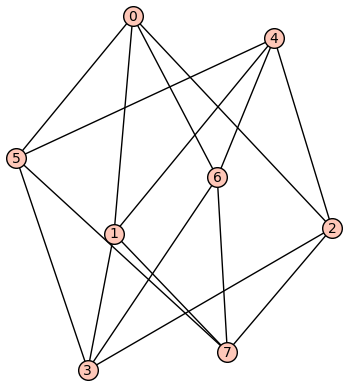

In [72]:
Graph(A1).show()

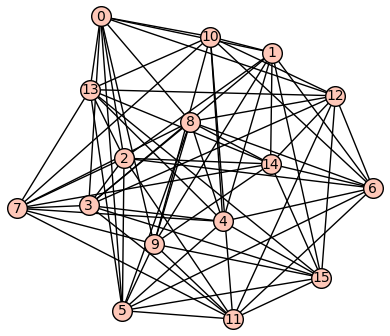

In [73]:
Graph(A2).show()

In [63]:
A1

[0 1 1 1 1 0 0 0 0]
[1 0 1 0 0 1 1 0 0]
[1 1 0 0 0 0 0 1 1]
[1 0 0 0 1 1 0 1 0]
[1 0 0 1 0 0 1 0 1]
[0 1 0 1 0 0 1 1 0]
[0 1 0 0 1 1 0 0 1]
[0 0 1 1 0 1 0 0 1]
[0 0 1 0 1 0 1 1 0]

In [64]:
A2

[0 1 1 0 0 1]
[1 0 0 1 1 0]
[1 0 0 1 1 0]
[0 1 1 0 0 1]
[0 1 1 0 0 1]
[1 0 0 1 1 0]

In [74]:
Graph(A2).is_isomorphic(graphs.OrthogonalArrayBlockGraph(2, 4))

False

In [81]:
# Open the file in write mode
for n in range(4, 30):
    try:
        OA = designs.orthogonal_arrays.build(n+1, n)
        new_OA = []
        for i in OA:
            new_OA.append(i[2:])
            
        OA_graph = graphs.OrthogonalArrayBlockGraph(n-1, n, new_OA)
        
        OA = FYP_Graph(OA_graph)

        switched_OA = OA.delete_vertex(0)
        
        rank = switched_OA.get_coherent_rank()
        t_matrix = switched_OA.get_type_matrix()
        
        statement = f"Switching first vertex on OA({n-1}, {n}), {rank}\n\nType Matrix:\n"
        for row in t_matrix:
            statement += str(row) + "\n"
        print(statement)
        # file.write(statement + "\n")
    except Exception as e:
        print(e)
        # file.write(f"Error for OA({n-1}, {n}): {e}\n")


Switching first vertex on OA(3, 4), rank 10

Type Matrix:
(3, 2)
(2, 3)

Switching first vertex on OA(4, 5), rank 10

Type Matrix:
(3, 2)
(2, 3)

By the Bruck-Ryser theorem, no projective plane of order 6 exists.
Switching first vertex on OA(6, 7), rank 10

Type Matrix:
(3, 2)
(2, 3)

Switching first vertex on OA(7, 8), rank 10

Type Matrix:
(3, 2)
(2, 3)

Switching first vertex on OA(8, 9), rank 10

Type Matrix:
(3, 2)
(2, 3)

No projective plane of order 10 exists by C. Lam, L. Thiel and S. Swiercz "The nonexistence of finite projective planes of order 10" (1989), Canad. J. Math.
Switching first vertex on OA(10, 11), rank 10

Type Matrix:
(3, 2)
(2, 3)

I don't know how to build an OA(13,12)!
Switching first vertex on OA(12, 13), rank 10

Type Matrix:
(3, 2)
(2, 3)

By the Bruck-Ryser theorem, no projective plane of order 14 exists.
I don't know how to build an OA(16,15)!
Switching first vertex on OA(15, 16), rank 10

Type Matrix:
(3, 2)
(2, 3)

Switching first vertex on OA(16, 17), 

In [149]:
n = 4

# to get the n-1 MOLS of order n
OA = designs.orthogonal_arrays.build(n+1, n)
new_OA = []
for i in OA:
    new_OA.append(i[2:]) # remove the "coordinate" columns

OA_graph = FYP_Graph(graphs.OrthogonalArrayBlockGraph(n-1, n, new_OA))
    
deleted_OA = OA_graph.delete_vertex(0)

rank = deleted_OA.get_coherent_rank()
t_matrix = deleted_OA.get_type_matrix()
print(t_matrix)

[3 2]
[2 3]


In [156]:
OA_graph.obj.complement().is_isomorphic(OA_Graph(2, 4).obj)


True

In [144]:
deleted_OA.get_blocks()

[
[0 1 0 1 0 1 0 1 1 0 1 0 0 1]  [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0]
[1 0 1 0 1 0 1 0 0 1 0 1 1 0]  [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1]
[0 1 0 1 0 1 0 1 1 0 1 0 0 1]  [1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1]
[1 0 1 0 1 0 1 0 0 1 0 1 1 0]  [1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1]
[0 1 0 1 0 1 0 1 1 0 1 0 0 1]  [1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1]
[1 0 1 0 1 0 1 0 0 1 0 1 1 0]  [1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0]
[0 1 0 1 0 1 0 1 1 0 1 0 0 1]  [1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1]
[1 0 1 0 1 0 1 0 0 1 0 1 1 0]  [1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1

In [134]:
Matrix(OA_graph.obj.vertices()).T

[0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]
[0 3 1 2 2 1 3 0 3 0 2 1 1 2 0 3]
[0 2 3 1 2 0 1 3 3 1 0 2 1 3 2 0]

In [135]:
Matrix(deleted_OA.obj.vertices()).T

[0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]
[3 1 2 2 1 3 0 3 0 2 1 1 2 0 3]
[2 3 1 2 0 1 3 3 1 0 2 1 3 2 0]

In [136]:
Matrix(new_OA).T

[0 2 3 1 3 1 0 2 1 3 2 0 2 0 1 3]
[0 3 1 2 2 1 3 0 3 0 2 1 1 2 0 3]
[0 3 1 2 3 0 2 1 1 2 0 3 2 1 3 0]

In [141]:
n = 8

# to get the n-1 MOLS of order n
OA = designs.orthogonal_arrays.build(n+1, n)
new_OA = []
for i in OA:
    new_OA.append(i[2:]) # remove the "coordinate" columns

OA_graph = FYP_Graph(graphs.OrthogonalArrayBlockGraph(n-1, n, new_OA))
    
deleted_OA = OA_graph.delete_vertex(0)

rank = deleted_OA.get_coherent_rank()
t_matrix = deleted_OA.get_type_matrix()
print(t_matrix)

[3 2]
[2 3]


In [142]:
A1 = deleted_OA.get_blocks()[0]
A2 = deleted_OA.get_blocks()[-1]

In [143]:
print(FYP_Graph(Graph(A1)).get_coherent_rank())
print(FYP_Graph(Graph(A2)).get_coherent_rank())

rank 3
rank 3


In [1]:
from graph_models import *

In [2]:
a = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, 3)).get_adjacency_matrix()
a

[0 1 1 1 0 0 1 0 0]
[1 0 1 0 1 0 0 1 0]
[1 1 0 0 0 1 0 0 1]
[1 0 0 0 1 1 1 0 0]
[0 1 0 1 0 1 0 1 0]
[0 0 1 1 1 0 0 0 1]
[1 0 0 1 0 0 0 1 1]
[0 1 0 0 1 0 1 0 1]
[0 0 1 0 0 1 1 1 0]

In [3]:
new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, 3)).switch_graph_edges([0,1,2])

In [4]:
new_g.get_adjacency_matrix()

[0 1 1 0 1 1 0 1 1]
[1 0 1 1 0 1 1 0 1]
[1 1 0 1 1 0 1 1 0]
[0 1 1 0 1 1 1 0 0]
[1 0 1 1 0 1 0 1 0]
[1 1 0 1 1 0 0 0 1]
[0 1 1 1 0 0 0 1 1]
[1 0 1 0 1 0 1 0 1]
[1 1 0 0 0 1 1 1 0]

In [6]:
new_g.get_coherent_rank()

'rank 10'

In [7]:
new_g.get_config_list()

[[[0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1]],
 [[1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 1, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 1, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0,

In [9]:
new_g.get_type_matrix()

[2 2]
[2 4]

In [11]:
for n in range(3, 10):
    new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, n)).switch_graph_edges([i for i in range(n)])
    print(f"For n: {n}")
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For n: 3
rank 10
[2 2]
[2 4]

For n: 4
rank 10
[2 2]
[2 4]

For n: 5
rank 10
[2 2]
[2 4]

For n: 6
rank 10
[2 2]
[2 4]

For n: 7
rank 10
[2 2]
[2 4]

For n: 8
rank 10
[2 2]
[2 4]

For n: 9
rank 10
[2 2]
[2 4]



In [21]:
for n in range(4, 30):
    new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(3, n)).switch_graph_edges([i for i in range(n)])
    print(f"For (3, {n})")
    # print(new_g.get_adjacency_matrix())
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For (3, 4)
rank 3
[3]

For (3, 5)
rank 20
[ 2  3]
[ 3 12]

For (3, 6)
rank 68
[4 2 4 3]
[2 4 3 4]
[4 3 8 6]
[3 4 6 8]

For (3, 7)
rank 34
[ 2  4]
[ 4 24]

For (3, 8)
rank 90
[ 4  3  4  4]
[ 3  4  4  4]
[ 4  4  8  8]
[ 4  4  8 20]

For (3, 9)
rank 75
[ 3  3  5]
[ 3  6 10]
[ 5 10 30]

For (3, 10)
rank 144
[ 4  2  5  6]
[ 2  4  6  5]
[ 5  6 24 20]
[ 6  5 20 24]

For (3, 11)
rank 74
[ 2  6]
[ 6 60]

For (3, 12)
rank 288
[ 6  4  6  4  5  6]
[ 4  6  5  4  6  6]
[ 6  5 12  6 10 12]
[ 4  4  6 12  6 14]
[ 5  6 10  6 12 12]
[ 6  6 12 14 12 28]

For (3, 13)
rank 100
[ 2  7]
[ 7 84]

For (3, 14)
rank 252
[ 4  2  7  8]
[ 2  4  8  7]
[ 7  8 48 42]
[ 8  7 42 48]

For (3, 15)
rank 248
[ 4  4  6  8]
[ 4  8  8 16]
[ 6  8 24 32]
[ 8 16 32 64]

For (3, 16)
rank 332
[ 5  4  5  7  8]
[ 4  5  5  7  8]
[ 5  5 10 14 16]
[ 7  7 14 28 32]
[ 8  8 16 32 72]

For (3, 17)
rank 164
[  2   9]
[  9 144]

For (3, 18)
rank 562
[ 6  3  5  6  9 10]
[ 3  6  6  5 10  9]
[ 5  6 12 10 20 18]
[ 6  5 10 12 18 20]
[ 9 10 20 18 60

KeyboardInterrupt: 

In [20]:
n = 5
original = OA_Graph(3, n)
print(original.get_adjacency_matrix())
print(factor(original.get_adjacency_matrix().charpoly()))
print()

new_g = original.switch_graph_edges([i for i in range(n)])
print(new_g.get_adjacency_matrix())
print()

print(f"For (3, {n})")

print(new_g.get_coherent_rank())
print(new_g.get_type_matrix())
print()

[0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0]
[1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0]
[1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0]
[1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1]
[1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1]
[1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0]
[0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0]
[0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1]
[0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0]
[1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1]
[1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0]
[0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1]
[0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0]
[1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0]
[0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1]
[1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1]
[0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0]
[1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0]
[0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0]
[0 0 1 0 1 0

In [1]:
from graph_models import *

In [52]:
n = 6

deleted_graph = OA_Graph(2,n).delete_vertex(0)

In [53]:
deleted_graph.get_coherent_rank()

'rank 10'

In [54]:
blocks = deleted_graph.get_blocks()
blocks

[
[0 1 1 1 1 0 0 0 0 0]
[1 0 1 1 1 0 0 0 0 0]
[1 1 0 1 1 0 0 0 0 0]
[1 1 1 0 1 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0]
[0 0 0 0 0 0 1 1 1 1]
[0 0 0 0 0 1 0 1 1 1]
[0 0 0 0 0 1 1 0 1 1]
[0 0 0 0 0 1 1 1 0 1]
[0 0 0 0 0 1 1 1 1 0],

[1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
[0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0]
[0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
[0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0]
[0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]
[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1],

25 x 10 dense matrix over Integer Ring,

25 x 25 dense matrix over Integer Ring
]

In [1]:
from graph_models import *



In [11]:
for i in range(1,30):
    n = Primes().unrank(i)
    if n % 4 != 1:
        continue
    graph = FYP_Graph(graphs.PaleyGraph(n)).delete_vertex(0)
    print(f"n:{n}, {graph.get_coherent_rank()}")

n:5, rank 8
n:13, rank 24
n:17, rank 32
n:29, rank 56
n:37, rank 72
n:41, rank 80
n:53, rank 104
n:61, rank 120
n:73, rank 144
n:89, rank 176
n:97, rank 192
n:101, rank 200
n:109, rank 216
n:113, rank 224


In [4]:
for n in range(3,20):
    graph = Triangle_Graph(n).delete_vertex(0)
    print(f"n:{n}, {graph.get_coherent_rank()}")

n:3, rank 2
n:4, rank 6
n:5, rank 10
n:6, rank 11
n:7, rank 11
n:8, rank 11
n:9, rank 11
n:10, rank 11
n:11, rank 11
n:12, rank 11
n:13, rank 11
n:14, rank 11
n:15, rank 11
n:16, rank 11
n:17, rank 11
n:18, rank 11
n:19, rank 11


In [58]:
A1 * C

[0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
[1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1]
[1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1]
[1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1]
[1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0]
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]

In [59]:
J - C == A1 * C

True

In [63]:
for n in range(3, 10):
    new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, n)).switch_graph_edges([i for i in range(n)])
    print(f"For n: {n}")
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For n: 3
rank 10
[2 2]
[2 4]

For n: 4
rank 10
[2 2]
[2 4]

For n: 5
rank 10
[2 2]
[2 4]

For n: 6
rank 10
[2 2]
[2 4]

For n: 7
rank 10
[2 2]
[2 4]

For n: 8
rank 10
[2 2]
[2 4]

For n: 9
rank 10
[2 2]
[2 4]



In [68]:
n=4
new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, n)).switch_graph_edges([i for i in range(n)])
print(f"For n: {n}")
print(new_g.get_blocks()[0])
print(new_g.get_blocks()[-1])

For n: 4
[0 1 1 1]
[1 0 1 1]
[1 1 0 1]
[1 1 1 0]
[0 1 1 1 1 0 0 0 1 0 0 0]
[1 0 1 1 0 1 0 0 0 1 0 0]
[1 1 0 1 0 0 1 0 0 0 1 0]
[1 1 1 0 0 0 0 1 0 0 0 1]
[1 0 0 0 0 1 1 1 1 0 0 0]
[0 1 0 0 1 0 1 1 0 1 0 0]
[0 0 1 0 1 1 0 1 0 0 1 0]
[0 0 0 1 1 1 1 0 0 0 0 1]
[1 0 0 0 1 0 0 0 0 1 1 1]
[0 1 0 0 0 1 0 0 1 0 1 1]
[0 0 1 0 0 0 1 0 1 1 0 1]
[0 0 0 1 0 0 0 1 1 1 1 0]


In [79]:
n=5
new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, n))
print(sum(new_g.get_adjacency_matrix()))
new_g = new_g.switch_graph_edges([i for i in range(n)])
print(f"For n: {n}")
# print(new_g.get_blocks()[0])
# print(new_g.get_blocks()[1])
# print()
# print(new_g.get_blocks()[-1])

(8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8)
For n: 5


In [87]:
for n in range(3, 10):
    new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, n)).switch_graph_edges([i for i in range(n)])
    print(f"For n: {n}")
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For n: 3
rank 10
[2 2]
[2 4]

For n: 4
rank 10
[2 2]
[2 4]

For n: 5
rank 10
[2 2]
[2 4]

For n: 6
rank 10
[2 2]
[2 4]

For n: 7
rank 10
[2 2]
[2 4]

For n: 8
rank 10
[2 2]
[2 4]

For n: 9
rank 10
[2 2]
[2 4]



In [88]:
for n in range(3, 10):
    new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, n)).switch_graph_edges([i for i in range(2*n)])
    print(f"For n: {n}")
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For n: 3
rank 10
[2 2]
[2 4]

For n: 4
rank 3
[3]

For n: 5
rank 12
[4 2]
[2 4]

For n: 6
rank 12
[4 2]
[2 4]

For n: 7
rank 12
[4 2]
[2 4]

For n: 8
rank 12
[4 2]
[2 4]

For n: 9
rank 12
[4 2]
[2 4]



In [90]:
for n in range(3, 20):
    new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, n)).switch_graph_edges([i for i in range(3*n)])
    print(f"For n: {n}")
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For n: 3
rank 3
[3]

For n: 4
rank 10
[2 2]
[2 4]

For n: 5
rank 12
[4 2]
[2 4]

For n: 6
rank 6
[6]

For n: 7
rank 12
[4 2]
[2 4]

For n: 8
rank 12
[4 2]
[2 4]

For n: 9
rank 12
[4 2]
[2 4]

For n: 10
rank 12
[4 2]
[2 4]

For n: 11
rank 12
[4 2]
[2 4]

For n: 12
rank 12
[4 2]
[2 4]

For n: 13
rank 12
[4 2]
[2 4]

For n: 14
rank 12
[4 2]
[2 4]

For n: 15
rank 12
[4 2]
[2 4]

For n: 16
rank 12
[4 2]
[2 4]

For n: 17
rank 12
[4 2]
[2 4]

For n: 18
rank 12
[4 2]
[2 4]

For n: 19
rank 12
[4 2]
[2 4]



In [92]:
for n in range(4, 20):
    new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, n)).switch_graph_edges([i for i in range(4*n)])
    print(f"For n: {n}")
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For n: 4
rank 3
[3]

For n: 5
rank 10
[2 2]
[2 4]

For n: 6
rank 12
[4 2]
[2 4]

For n: 7
rank 12
[4 2]
[2 4]

For n: 8
rank 6
[6]

For n: 9
rank 12
[4 2]
[2 4]

For n: 10
rank 12
[4 2]
[2 4]

For n: 11
rank 12
[4 2]
[2 4]

For n: 12
rank 12
[4 2]
[2 4]

For n: 13
rank 12
[4 2]
[2 4]

For n: 14
rank 12
[4 2]
[2 4]

For n: 15
rank 12
[4 2]
[2 4]

For n: 16
rank 12
[4 2]
[2 4]

For n: 17
rank 12
[4 2]
[2 4]

For n: 18
rank 12
[4 2]
[2 4]

For n: 19
rank 12
[4 2]
[2 4]



In [93]:
for n in range(5, 20):
    new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, n)).switch_graph_edges([i for i in range(5*n)])
    print(f"For n: {n}")
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For n: 5
rank 3
[3]

For n: 6
rank 10
[2 2]
[2 4]

For n: 7
rank 12
[4 2]
[2 4]

For n: 8
rank 12
[4 2]
[2 4]

For n: 9
rank 12
[4 2]
[2 4]

For n: 10
rank 6
[6]

For n: 11
rank 12
[4 2]
[2 4]

For n: 12
rank 12
[4 2]
[2 4]

For n: 13
rank 12
[4 2]
[2 4]

For n: 14
rank 12
[4 2]
[2 4]

For n: 15
rank 12
[4 2]
[2 4]

For n: 16
rank 12
[4 2]
[2 4]

For n: 17
rank 12
[4 2]
[2 4]

For n: 18
rank 12
[4 2]
[2 4]

For n: 19
rank 12
[4 2]
[2 4]



In [103]:
tri = OA_Graph(2,10)
tri = tri.switch_graph_edges([i for i in range(len(tri.obj.vertices())/2)])
tri.get_type_matrix()

[6]

In [104]:
for n in range(3, 20):
    new_g = OA_Graph(3,n).switch_graph_edges([i for i in range(n)])
    print(f"For n: {n}")
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For n: 3
rank 9
[2 2]
[2 3]

For n: 4
rank 3
[3]

For n: 5
rank 20
[ 2  3]
[ 3 12]

For n: 6
rank 68
[4 2 3 4]
[2 4 4 3]
[3 4 8 6]
[4 3 6 8]

For n: 7
rank 34
[ 2  4]
[ 4 24]

For n: 8
rank 90
[ 4  3  4  4]
[ 3  4  4  4]
[ 4  4  8  8]
[ 4  4  8 20]

For n: 9
rank 75
[ 3  3  5]
[ 3  6 10]
[ 5 10 30]

For n: 10
rank 144
[ 4  2  6  5]
[ 2  4  5  6]
[ 6  5 24 20]
[ 5  6 20 24]

For n: 11
rank 74
[ 2  6]
[ 6 60]

For n: 12
rank 288
[ 6  4  4  5  6  6]
[ 4  6  4  6  5  6]
[ 4  4 12  6  6 14]
[ 5  6  6 12 10 12]
[ 6  5  6 10 12 12]
[ 6  6 14 12 12 28]

For n: 13
rank 100
[ 2  7]
[ 7 84]

For n: 14
rank 252
[ 4  2  7  8]
[ 2  4  8  7]
[ 7  8 48 42]
[ 8  7 42 48]

For n: 15
rank 248
[ 4  4  6  8]
[ 4  8  8 16]
[ 6  8 24 32]
[ 8 16 32 64]

For n: 16
rank 332
[ 5  4  5  7  8]
[ 4  5  5  7  8]
[ 5  5 10 14 16]
[ 7  7 14 28 32]
[ 8  8 16 32 72]

For n: 17
rank 164
[  2   9]
[  9 144]

For n: 18
rank 562
[ 6  3  6  5 10  9]
[ 3  6  5  6  9 10]
[ 6  5 12 10 20 18]
[ 5  6 10 12 18 20]
[10  9 20 18 60 

In [105]:
for n in range(3, 20):
    new_g = OA_Graph(3,n).switch_graph_edges([i for i in range(2*n)])
    print(f"For n: {n}")
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For n: 3
rank 9
[2 2]
[2 3]

For n: 4
rank 3
[3]

For n: 5
rank 39
[3 3 3]
[3 6 6]
[3 6 6]

For n: 6
rank 63
[7 7 7]
[7 7 7]
[7 7 7]

For n: 7
rank 100
[4 4 4 4]
[4 8 8 8]
[4 8 8 8]
[4 8 8 8]

For n: 8
rank 144
[9 9 9 9]
[9 9 9 9]
[9 9 9 9]
[9 9 9 9]

For n: 9
rank 205
[ 5  5  5  5  5]
[ 5 10 10 10 10]
[ 5 10 10 10 10]
[ 5 10 10 10 10]
[ 5 10 10 10 10]

For n: 10
rank 275
[11 11 11 11 11]
[11 11 11 11 11]
[11 11 11 11 11]
[11 11 11 11 11]
[11 11 11 11 11]

For n: 11
rank 366
[ 6  6  6  6  6  6]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]

For n: 12
rank 468
[13 13 13 13 13 13]
[13 13 13 13 13 13]
[13 13 13 13 13 13]
[13 13 13 13 13 13]
[13 13 13 13 13 13]
[13 13 13 13 13 13]

For n: 13
rank 595
[ 7  7  7  7  7  7  7]
[ 7 14 14 14 14 14 14]
[ 7 14 14 14 14 14 14]
[ 7 14 14 14 14 14 14]
[ 7 14 14 14 14 14 14]
[ 7 14 14 14 14 14 14]
[ 7 14 14 14 14 14 14]

For n: 14
rank 735
[15 15 15 15 15 15 15]
[15 15 15 15 15 15 15]
[15 15 15 15 

In [106]:
for n in range(3, 10):
    new_g = OA_Graph(3,n).switch_graph_edges([i for i in range(3*n)])
    print(f"For n: {n}")
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For n: 3
rank 3
[3]

For n: 4
rank 3
[3]

For n: 5
rank 39
[3 3 3]
[3 6 6]
[3 6 6]

For n: 6
rank 3
[3]

For n: 7
rank 100
[4 4 4 4]
[4 8 8 8]
[4 8 8 8]
[4 8 8 8]

For n: 8
rank 150
[ 5  3  4  4  5]
[ 3  5  4  4  5]
[ 4  4 10 10  8]
[ 4  4 10 10  8]
[ 5  5  8  8 10]

For n: 9
rank 205
[ 5  5  5  5  5]
[ 5 10 10 10 10]
[ 5 10 10 10 10]
[ 5 10 10 10 10]
[ 5 10 10 10 10]



### For OA$(2,n)$

In [148]:
for n in range(3,20):
    print("-"*30)
    print(f"n: {n}")
    for k in range(1,n//2+1):
        graph = OA_Graph(2,n)
        switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
        print(f"Switching {k} blocks")
        print(switched_graph.get_coherent_rank())
        print(switched_graph.get_type_matrix())
        print()
    print()

------------------------------
n: 3
Switching 1 blocks
rank 10
[2 2]
[2 4]


------------------------------
n: 4
Switching 1 blocks
rank 10
[2 2]
[2 4]

Switching 2 blocks
rank 3
[3]


------------------------------
n: 5
Switching 1 blocks
rank 10
[2 2]
[2 4]

Switching 2 blocks
rank 12
[4 2]
[2 4]


------------------------------
n: 6
Switching 1 blocks
rank 10
[2 2]
[2 4]

Switching 2 blocks
rank 12
[4 2]
[2 4]

Switching 3 blocks
rank 6
[6]


------------------------------
n: 7
Switching 1 blocks
rank 10
[2 2]
[2 4]

Switching 2 blocks
rank 12
[4 2]
[2 4]

Switching 3 blocks
rank 12
[4 2]
[2 4]


------------------------------
n: 8
Switching 1 blocks
rank 10
[2 2]
[2 4]

Switching 2 blocks
rank 12
[4 2]
[2 4]

Switching 3 blocks
rank 12
[4 2]
[2 4]

Switching 4 blocks
rank 6
[6]


------------------------------
n: 9
Switching 1 blocks
rank 10
[2 2]
[2 4]

Switching 2 blocks
rank 12
[4 2]
[2 4]

Switching 3 blocks
rank 12
[4 2]
[2 4]

Switching 4 blocks
rank 12
[4 2]
[2 4]


--------

### For OA$(3,n)$

In [149]:
for n in range(3,16):
    # n = 16 took too long to run
    print("-"*30)
    print(f"n: {n}")
    for k in range(1,n // 2 + 1):
        graph = OA_Graph(3,n)
        switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
        print(f"Switching {k} blocks")
        print(switched_graph.get_coherent_rank())
        print(switched_graph.get_type_matrix())
        print()
    print()

------------------------------
n: 3
Switching 1 blocks
rank 9
[2 2]
[2 3]


------------------------------
n: 4
Switching 1 blocks
rank 3
[3]

Switching 2 blocks
rank 3
[3]


------------------------------
n: 5
Switching 1 blocks
rank 20
[ 2  3]
[ 3 12]

Switching 2 blocks
rank 39
[3 3 3]
[3 6 6]
[3 6 6]


------------------------------
n: 6
Switching 1 blocks
rank 68
[4 2 3 4]
[2 4 4 3]
[3 4 8 6]
[4 3 6 8]

Switching 2 blocks
rank 63
[7 7 7]
[7 7 7]
[7 7 7]

Switching 3 blocks
rank 3
[3]


------------------------------
n: 7
Switching 1 blocks
rank 34
[ 2  4]
[ 4 24]

Switching 2 blocks
rank 100
[4 4 4 4]
[4 8 8 8]
[4 8 8 8]
[4 8 8 8]

Switching 3 blocks
rank 100
[4 4 4 4]
[4 8 8 8]
[4 8 8 8]
[4 8 8 8]


------------------------------
n: 8
Switching 1 blocks
rank 90
[ 4  3  4  4]
[ 3  4  4  4]
[ 4  4  8  8]
[ 4  4  8 20]

Switching 2 blocks
rank 144
[9 9 9 9]
[9 9 9 9]
[9 9 9 9]
[9 9 9 9]

Switching 3 blocks
rank 150
[ 5  3  4  5  4]
[ 3  5  4  5  4]
[ 4  4 10  8 10]
[ 5  5  8 10  8]


In [152]:
for n in range(3,30):
    print("-"*30)
    print(f"n: {n}")
    k = 1
    graph = OA_Graph(3,n)
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    print(f"Switching {k} blocks")
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()

------------------------------
n: 3
Switching 1 blocks
rank 9
[2 2]
[2 3]

------------------------------
n: 4
Switching 1 blocks
rank 3
[3]

------------------------------
n: 5
Switching 1 blocks
rank 20
[ 2  3]
[ 3 12]

------------------------------
n: 6
Switching 1 blocks
rank 68
[4 2 4 3]
[2 4 3 4]
[4 3 8 6]
[3 4 6 8]

------------------------------
n: 7
Switching 1 blocks
rank 34
[ 2  4]
[ 4 24]

------------------------------
n: 8
Switching 1 blocks
rank 90
[ 4  3  4  4]
[ 3  4  4  4]
[ 4  4  8  8]
[ 4  4  8 20]

------------------------------
n: 9
Switching 1 blocks
rank 75
[ 3  3  5]
[ 3  6 10]
[ 5 10 30]

------------------------------
n: 10
Switching 1 blocks
rank 144
[ 4  2  5  6]
[ 2  4  6  5]
[ 5  6 24 20]
[ 6  5 20 24]

------------------------------
n: 11
Switching 1 blocks
rank 74
[ 2  6]
[ 6 60]

------------------------------
n: 12
Switching 1 blocks
rank 288
[ 6  4  4  6  5  6]
[ 4  6  4  5  6  6]
[ 4  4 12  6  6 14]
[ 6  5  6 12 10 12]
[ 5  6  6 10 12 12]
[ 6  6 14

In [1]:
from graph_models import *

In [2]:
for n in range(3,20):
    print("-"*30)
    print(f"n: {n}")
    k = 1
    graph = OA_Graph(2,n)
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    print(f"Switching {k} blocks")
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()
    # print()

------------------------------
n: 3
Switching 1 blocks
rank 10
[2 2]
[2 4]

------------------------------
n: 4
Switching 1 blocks
rank 10
[2 2]
[2 4]

------------------------------
n: 5
Switching 1 blocks
rank 10
[2 2]
[2 4]

------------------------------
n: 6
Switching 1 blocks
rank 10
[2 2]
[2 4]

------------------------------
n: 7
Switching 1 blocks
rank 10
[2 2]
[2 4]

------------------------------
n: 8
Switching 1 blocks
rank 10
[2 2]
[2 4]

------------------------------
n: 9
Switching 1 blocks
rank 10
[2 2]
[2 4]

------------------------------
n: 10
Switching 1 blocks
rank 10
[2 2]
[2 4]

------------------------------
n: 11
Switching 1 blocks
rank 10
[2 2]
[2 4]

------------------------------
n: 12
Switching 1 blocks
rank 10
[2 2]
[2 4]

------------------------------
n: 13
Switching 1 blocks
rank 10
[2 2]
[2 4]

------------------------------
n: 14
Switching 1 blocks
rank 10
[2 2]
[2 4]

------------------------------
n: 15
Switching 1 blocks
rank 10
[2 2]
[2 4]

------

In [4]:
print("-"*30) 
n = 4
print(f"n: {n}")
k = 1
graph = OA_Graph(2,n)
switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
print(f"Switching {k} blocks")
print(switched_graph.get_coherent_rank())
print(switched_graph.get_type_matrix())
print()

------------------------------
n: 4
Switching 1 blocks
rank 10
[2 2]
[2 4]



In [5]:
switched_graph.get_adjacency_matrix()

[0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1]
[1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1]
[1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1]
[1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0]
[0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0]
[1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0]
[1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0]
[1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1]
[0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0]
[1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0]
[1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0]
[1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1]
[0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1]
[1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1]
[1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1]
[1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0]

In [6]:
graph.get_adjacency_matrix()

[0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0]
[1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0]
[1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0]
[1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1]
[1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0]
[0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0]
[0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0]
[0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1]
[1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0]
[0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0]
[0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0]
[0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1]
[1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1]
[0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1]
[0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1]
[0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0]

In [9]:
graph.final_config_matrix

[0 2 2 2 2 1 1 1 2 1 1 1 2 1 1 1]
[2 0 2 2 1 2 1 1 1 2 1 1 1 2 1 1]
[2 2 0 2 1 1 2 1 1 1 2 1 1 1 2 1]
[2 2 2 0 1 1 1 2 1 1 1 2 1 1 1 2]
[2 1 1 1 0 2 2 2 2 1 1 1 2 1 1 1]
[1 2 1 1 2 0 2 2 1 2 1 1 1 2 1 1]
[1 1 2 1 2 2 0 2 1 1 2 1 1 1 2 1]
[1 1 1 2 2 2 2 0 1 1 1 2 1 1 1 2]
[2 1 1 1 2 1 1 1 0 2 2 2 2 1 1 1]
[1 2 1 1 1 2 1 1 2 0 2 2 1 2 1 1]
[1 1 2 1 1 1 2 1 2 2 0 2 1 1 2 1]
[1 1 1 2 1 1 1 2 2 2 2 0 1 1 1 2]
[2 1 1 1 2 1 1 1 2 1 1 1 0 2 2 2]
[1 2 1 1 1 2 1 1 1 2 1 1 2 0 2 2]
[1 1 2 1 1 1 2 1 1 1 2 1 2 2 0 2]
[1 1 1 2 1 1 1 2 1 1 1 2 2 2 2 0]

In [10]:
switched_graph.final_config_matrix

[1 5 5 5 4 6 6 6 4 6 6 6 4 6 6 6]
[5 1 5 5 6 4 6 6 6 4 6 6 6 4 6 6]
[5 5 1 5 6 6 4 6 6 6 4 6 6 6 4 6]
[5 5 5 1 6 6 6 4 6 6 6 4 6 6 6 4]
[2 7 7 7 0 8 8 8 9 3 3 3 9 3 3 3]
[7 2 7 7 8 0 8 8 3 9 3 3 3 9 3 3]
[7 7 2 7 8 8 0 8 3 3 9 3 3 3 9 3]
[7 7 7 2 8 8 8 0 3 3 3 9 3 3 3 9]
[2 7 7 7 9 3 3 3 0 8 8 8 9 3 3 3]
[7 2 7 7 3 9 3 3 8 0 8 8 3 9 3 3]
[7 7 2 7 3 3 9 3 8 8 0 8 3 3 9 3]
[7 7 7 2 3 3 3 9 8 8 8 0 3 3 3 9]
[2 7 7 7 9 3 3 3 9 3 3 3 0 8 8 8]
[7 2 7 7 3 9 3 3 3 9 3 3 8 0 8 8]
[7 7 2 7 3 3 9 3 3 3 9 3 8 8 0 8]
[7 7 7 2 3 3 3 9 3 3 3 9 8 8 8 0]

In [36]:
print("-"*30) 
n = 5
print(f"n: {n}")
k = 2
graph = OA_Graph(2,n)
switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
print(f"Switching {k} blocks")
print(switched_graph.get_coherent_rank())
print(switched_graph.get_type_matrix())
print()
print(switched_graph.final_config_matrix)

------------------------------
n: 5
Switching 2 blocks
rank 12
[4 2]
[2 4]

[ 0  7  7  7  7  6  2  2  2  2  5 11 11 11 11  5 11 11 11 11  5 11 11 11 11]
[ 7  0  7  7  7  2  6  2  2  2 11  5 11 11 11 11  5 11 11 11 11  5 11 11 11]
[ 7  7  0  7  7  2  2  6  2  2 11 11  5 11 11 11 11  5 11 11 11 11  5 11 11]
[ 7  7  7  0  7  2  2  2  6  2 11 11 11  5 11 11 11 11  5 11 11 11 11  5 11]
[ 7  7  7  7  0  2  2  2  2  6 11 11 11 11  5 11 11 11 11  5 11 11 11 11  5]
[ 6  2  2  2  2  0  7  7  7  7  5 11 11 11 11  5 11 11 11 11  5 11 11 11 11]
[ 2  6  2  2  2  7  0  7  7  7 11  5 11 11 11 11  5 11 11 11 11  5 11 11 11]
[ 2  2  6  2  2  7  7  0  7  7 11 11  5 11 11 11 11  5 11 11 11 11  5 11 11]
[ 2  2  2  6  2  7  7  7  0  7 11 11 11  5 11 11 11 11  5 11 11 11 11  5 11]
[ 2  2  2  2  6  7  7  7  7  0 11 11 11 11  5 11 11 11 11  5 11 11 11 11  5]
[ 4 10 10 10 10  4 10 10 10 10  1  9  9  9  9  8  3  3  3  3  8  3  3  3  3]
[10  4 10 10 10 10  4 10 10 10  9  1  9  9  9  3  8  3  3  3  3  8  3  3  3]


In [25]:
switched_graph.obj.adjacency_matrix().charpoly()

x^25 - 190*x^23 - 1190*x^22 + 4020*x^21 + 57890*x^20 + 81550*x^19 - 997170*x^18 - 4046245*x^17 + 4369910*x^16 + 58272480*x^15 + 80948800*x^14 - 334720960*x^13 - 1245068160*x^12 - 236587520*x^11 + 6242969600*x^10 + 12023001600*x^9 - 3833338880*x^8 - 45967073280*x^7 - 63949455360*x^6 + 3607511040*x^5 + 124548710400*x^4 + 185051381760*x^3 + 138071900160*x^2 + 55180984320*x + 9459597312

In [31]:
graph.obj.adjacency_matrix().charpoly(l)

l^25 - 100*l^23 - 200*l^22 + 3750*l^21 + 13160*l^20 - 66500*l^19 - 367800*l^18 + 445025*l^17 + 5567000*l^16 + 3702240*l^15 - 47024000*l^14 - 99534400*l^13 + 181171200*l^12 + 849472000*l^11 + 265287680*l^10 - 3344448000*l^9 - 5535027200*l^8 + 3132825600*l^7 + 18837504000*l^6 + 17820794880*l^5 - 10616832000*l^4 - 39016857600*l^3 - 38220595200*l^2 - 17915904000*l - 3439853568

In [28]:
var('l')

l

In [43]:
n=5
k=2

graph = OA_Graph(2,n)
switched_graph = graph.switch_graph_edges([i for i in range(k*n)])

In [48]:
set(switched_graph.obj.adjacency_matrix().eigenvalues())

{-4.310708435174292?, -2, 3, 15.31070843517430?}

In [46]:
print(switched_graph.get_adjacency_matrix())

[0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
[1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1]
[1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1]
[1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1]
[1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0]
[1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
[0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1]
[0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1]
[0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1]
[0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0]
[0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0]
[1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0]
[1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0]
[1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0]
[1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1]
[0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0]
[1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0]
[1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0]
[1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0]
[1 1 1 1 0 1

In [47]:
print(switched_graph.get_type_matrix())

[4 2]
[2 4]


In [49]:
blocks = switched_graph.get_blocks()
A_1 = blocks[0]
A_2 = blocks[-1]
C = blocks[1]

[
[0 1 1 1 1 1 0 0 0 0]  [0 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
[1 0 1 1 1 0 1 0 0 0]  [1 0 1 1 1 1 0 1 1 1 1 0 1 1 1]
[1 1 0 1 1 0 0 1 0 0]  [1 1 0 1 1 1 1 0 1 1 1 1 0 1 1]
[1 1 1 0 1 0 0 0 1 0]  [1 1 1 0 1 1 1 1 0 1 1 1 1 0 1]
[1 1 1 1 0 0 0 0 0 1]  [1 1 1 1 0 1 1 1 1 0 1 1 1 1 0]
[1 0 0 0 0 0 1 1 1 1]  [0 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
[0 1 0 0 0 1 0 1 1 1]  [1 0 1 1 1 1 0 1 1 1 1 0 1 1 1]
[0 0 1 0 0 1 1 0 1 1]  [1 1 0 1 1 1 1 0 1 1 1 1 0 1 1]
[0 0 0 1 0 1 1 1 0 1]  [1 1 1 0 1 1 1 1 0 1 1 1 1 0 1]
[0 0 0 0 1 1 1 1 1 0], [1 1 1 1 0 1 1 1 1 0 1 1 1 1 0],

[0 1 1 1 1 0 1 1 1 1]  [0 1 1 1 1 1 0 0 0 0 1 0 0 0 0]
[1 0 1 1 1 1 0 1 1 1]  [1 0 1 1 1 0 1 0 0 0 0 1 0 0 0]
[1 1 0 1 1 1 1 0 1 1]  [1 1 0 1 1 0 0 1 0 0 0 0 1 0 0]
[1 1 1 0 1 1 1 1 0 1]  [1 1 1 0 1 0 0 0 1 0 0 0 0 1 0]
[1 1 1 1 0 1 1 1 1 0]  [1 1 1 1 0 0 0 0 0 1 0 0 0 0 1]
[0 1 1 1 1 0 1 1 1 1]  [1 0 0 0 0 0 1 1 1 1 1 0 0 0 0]
[1 0 1 1 1 1 0 1 1 1]  [0 1 0 0 0 1 0 1 1 1 0 1 0 0 0]
[1 1 0 1 1 1 1 0 1 1]  [0 0 1 0 0 1 1 0 1 1 0 0 1 0 0]
[1 1 1

In [163]:
n=5
k=2

graph = OA_Graph(2,n)
switched_graph = graph.switch_graph_edges([i for i in range(k*n)])

blocks = switched_graph.get_blocks()

A_1 = blocks[0]
A_2 = blocks[-1]
C = blocks[1]
for i in blocks:
    print(i)
    print("-"*30)

[0 1 1 1 1 1 0 0 0 0]
[1 0 1 1 1 0 1 0 0 0]
[1 1 0 1 1 0 0 1 0 0]
[1 1 1 0 1 0 0 0 1 0]
[1 1 1 1 0 0 0 0 0 1]
[1 0 0 0 0 0 1 1 1 1]
[0 1 0 0 0 1 0 1 1 1]
[0 0 1 0 0 1 1 0 1 1]
[0 0 0 1 0 1 1 1 0 1]
[0 0 0 0 1 1 1 1 1 0]
------------------------------
[0 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
[1 0 1 1 1 1 0 1 1 1 1 0 1 1 1]
[1 1 0 1 1 1 1 0 1 1 1 1 0 1 1]
[1 1 1 0 1 1 1 1 0 1 1 1 1 0 1]
[1 1 1 1 0 1 1 1 1 0 1 1 1 1 0]
[0 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
[1 0 1 1 1 1 0 1 1 1 1 0 1 1 1]
[1 1 0 1 1 1 1 0 1 1 1 1 0 1 1]
[1 1 1 0 1 1 1 1 0 1 1 1 1 0 1]
[1 1 1 1 0 1 1 1 1 0 1 1 1 1 0]
------------------------------
[0 1 1 1 1 0 1 1 1 1]
[1 0 1 1 1 1 0 1 1 1]
[1 1 0 1 1 1 1 0 1 1]
[1 1 1 0 1 1 1 1 0 1]
[1 1 1 1 0 1 1 1 1 0]
[0 1 1 1 1 0 1 1 1 1]
[1 0 1 1 1 1 0 1 1 1]
[1 1 0 1 1 1 1 0 1 1]
[1 1 1 0 1 1 1 1 0 1]
[1 1 1 1 0 1 1 1 1 0]
[0 1 1 1 1 0 1 1 1 1]
[1 0 1 1 1 1 0 1 1 1]
[1 1 0 1 1 1 1 0 1 1]
[1 1 1 0 1 1 1 1 0 1]
[1 1 1 1 0 1 1 1 1 0]
------------------------------
[0 1 1 1 1 1 0 0 0 0 1 0 0 0 0]
[1 0 

In [1]:
from graph_models import *


In [3]:
for n in range(3,30):
    graph = OA_Graph(2,n).delete_vertex(0)
    print(f"For n:{n}")
    print(graph.get_coherent_rank())
    print(graph.get_type_matrix())
    print("-"*30)

For n:3
rank 10
[3 2]
[2 3]
------------------------------
For n:4
rank 10
[3 2]
[2 3]
------------------------------
For n:5
rank 10
[3 2]
[2 3]
------------------------------
For n:6
rank 10
[3 2]
[2 3]
------------------------------
For n:7
rank 10
[3 2]
[2 3]
------------------------------
For n:8
rank 10
[3 2]
[2 3]
------------------------------
For n:9
rank 10
[3 2]
[2 3]
------------------------------
For n:10
rank 10
[3 2]
[2 3]
------------------------------
For n:11
rank 10
[3 2]
[2 3]
------------------------------
For n:12
rank 10
[3 2]
[2 3]
------------------------------
For n:13
rank 10
[3 2]
[2 3]
------------------------------
For n:14
rank 10
[3 2]
[2 3]
------------------------------
For n:15
rank 10
[3 2]
[2 3]
------------------------------
For n:16
rank 10
[3 2]
[2 3]
------------------------------
For n:17
rank 10
[3 2]
[2 3]
------------------------------
For n:18
rank 10
[3 2]
[2 3]
------------------------------
For n:19
rank 10
[3 2]
[2 3]
------------------

In [6]:
graph = OA_Graph(2,3).delete_vertex(0)
print(f"For n:{n}")
print(graph.get_coherent_rank())
print(graph.get_type_matrix())
for i in graph.get_config_list():
    print(Matrix(i))
    print()

For n:29
rank 10
[3 2]
[2 3]
[1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0]
[0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]

[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0]
[0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1]

[0 0 0 0 0 1 0 1]
[0 0 0 0 1 0 1 0]
[0 0 0 0 0 0 1 1]
[0 0 0 0 1 1 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]

[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 1 0 1 0 0 0 0]
[1 0 0 1 0 0 0 0]
[0 1 1 0 0 0 0 0]
[1 0 1 0 0 0 0 0]

[0 0 1 1 0 0 0 0]
[0 0 1 1 0 0 0 0]
[1 1 0 0 0 0 0 0]
[1 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]

[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 1 0]
[0 0 0 0 0 1 0 0]
[0 0 0 0 1 0 0 0]

[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 1 0]
[0 0 0 0 1 

In [164]:
switched_graph.get_config_list()

[[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

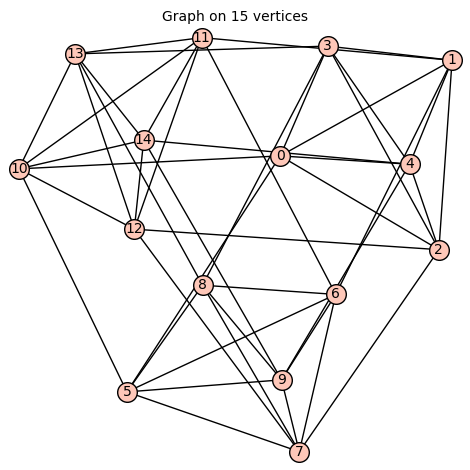

In [81]:
Graph(A_1)

In [162]:
Graph(A_2).plot()

KeyboardInterrupt: 

In [83]:
set(Graph(A_1).adjacency_matrix().eigenvalues())

{-2, 1, 3, 6}

In [84]:
set(Graph(A_2).adjacency_matrix().eigenvalues())

{-2, 0, 3, 5}

In [131]:
n=8
k=1

graph = OA_Graph(2,n)
switched_graph = graph.switch_graph_edges([i for i in range(k*n)])

blocks = switched_graph.get_blocks()

A_1 = blocks[0]
A_2 = blocks[-1]
C = blocks[1]
# for i in blocks:
#     print(i)
#     print("-"*30)

print(f"For {A_1.nrows() / n} K_{n}")
print(set(A_1.eigenvalues()))
print()
print(f"For {A_2.nrows() / n} K_{n}")
print(set(A_2.eigenvalues()))

For 1 K_8
{-1, 7}

For 7 K_8
{5, 13, 6, -2}


In [137]:
n=8
k=4

graph = OA_Graph(2,n)
switched_graph = graph.switch_graph_edges([i for i in range(k*n)])

blocks = switched_graph.get_blocks()

set(blocks[0].eigenvalues())

{-18, -2, 6, 38}

In [135]:
switched_graph.get_coherent_rank()

'rank 6'

In [160]:
n=20
k=1

res = {}
for k in range(1,n//2+1):
    graph = OA_Graph(2,n)
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    
    blocks = switched_graph.get_blocks()
    try:
        A_1 = blocks[0]
        A_2 = blocks[-1]
        C = blocks[1]
        # for i in blocks:
        #     print(i)
        #     print("-"*30)
        res[A_1.nrows() / n] = sorted(list(set(A_1.eigenvalues())))
        res[A_2.nrows() / n] = sorted(list(set(A_2.eigenvalues())))
    except:
        # k = n/2
        # there is only 1 block
        A_1 = blocks[0]
        res[A_1.nrows() / (2*n)] = sorted(list(set(A_1.eigenvalues())))

In [161]:
for k, v in sorted(res.items()):
    print(k, v)

1 [-1, 19]
2 [-2, 0, 18, 20]
3 [-2, 1, 18, 21]
4 [-2, 2, 18, 22]
5 [-2, 3, 18, 23]
6 [-2, 4, 18, 24]
7 [-2, 5, 18, 25]
8 [-2, 6, 18, 26]
9 [-2, 7, 18, 27]
10 [-162, -2, 18, 218]
11 [-2, 9, 18, 29]
12 [-2, 10, 18, 30]
13 [-2, 11, 18, 31]
14 [-2, 12, 18, 32]
15 [-2, 13, 18, 33]
16 [-2, 14, 18, 34]
17 [-2, 15, 18, 35]
18 [-2, 16, 18, 36]
19 [-2, 17, 18, 37]


In [167]:
FYP_Graph(Graph(A_1)).get_config_list()

[[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]],
 [[0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
  [0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
  [0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
  [0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
  [0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
  [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
  [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
  [1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
  [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 

In [1]:
from graphs_models import *

ModuleNotFoundError: No module named 'graphs_models'

In [7]:
n=5
k=2

graph = OA_Graph(2,n)
switched_graph = graph.switch_graph_edges([i for i in range(k*n)])

blocks = switched_graph.get_blocks()
blocks

[
[0 1 1 1 1 1 0 0 0 0]  [0 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
[1 0 1 1 1 0 1 0 0 0]  [1 0 1 1 1 1 0 1 1 1 1 0 1 1 1]
[1 1 0 1 1 0 0 1 0 0]  [1 1 0 1 1 1 1 0 1 1 1 1 0 1 1]
[1 1 1 0 1 0 0 0 1 0]  [1 1 1 0 1 1 1 1 0 1 1 1 1 0 1]
[1 1 1 1 0 0 0 0 0 1]  [1 1 1 1 0 1 1 1 1 0 1 1 1 1 0]
[1 0 0 0 0 0 1 1 1 1]  [0 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
[0 1 0 0 0 1 0 1 1 1]  [1 0 1 1 1 1 0 1 1 1 1 0 1 1 1]
[0 0 1 0 0 1 1 0 1 1]  [1 1 0 1 1 1 1 0 1 1 1 1 0 1 1]
[0 0 0 1 0 1 1 1 0 1]  [1 1 1 0 1 1 1 1 0 1 1 1 1 0 1]
[0 0 0 0 1 1 1 1 1 0], [1 1 1 1 0 1 1 1 1 0 1 1 1 1 0],

[0 1 1 1 1 0 1 1 1 1]  [0 1 1 1 1 1 0 0 0 0 1 0 0 0 0]
[1 0 1 1 1 1 0 1 1 1]  [1 0 1 1 1 0 1 0 0 0 0 1 0 0 0]
[1 1 0 1 1 1 1 0 1 1]  [1 1 0 1 1 0 0 1 0 0 0 0 1 0 0]
[1 1 1 0 1 1 1 1 0 1]  [1 1 1 0 1 0 0 0 1 0 0 0 0 1 0]
[1 1 1 1 0 1 1 1 1 0]  [1 1 1 1 0 0 0 0 0 1 0 0 0 0 1]
[0 1 1 1 1 0 1 1 1 1]  [1 0 0 0 0 0 1 1 1 1 1 0 0 0 0]
[1 0 1 1 1 1 0 1 1 1]  [0 1 0 0 0 1 0 1 1 1 0 1 0 0 0]
[1 1 0 1 1 1 1 0 1 1]  [0 0 1 0 0 1 1 0 1 1 0 0 1 0 0]
[1 1 1

In [8]:
A_1 = blocks[0]
A_2 = blocks[-1]
C = blocks[1]

In [9]:
C*C.T

[12  9  9  9  9 12  9  9  9  9]
[ 9 12  9  9  9  9 12  9  9  9]
[ 9  9 12  9  9  9  9 12  9  9]
[ 9  9  9 12  9  9  9  9 12  9]
[ 9  9  9  9 12  9  9  9  9 12]
[12  9  9  9  9 12  9  9  9  9]
[ 9 12  9  9  9  9 12  9  9  9]
[ 9  9 12  9  9  9  9 12  9  9]
[ 9  9  9 12  9  9  9  9 12  9]
[ 9  9  9  9 12  9  9  9  9 12]

In [171]:
C*A_2

[4 5 5 5 5 4 5 5 5 5 4 5 5 5 5]
[5 4 5 5 5 5 4 5 5 5 5 4 5 5 5]
[5 5 4 5 5 5 5 4 5 5 5 5 4 5 5]
[5 5 5 4 5 5 5 5 4 5 5 5 5 4 5]
[5 5 5 5 4 5 5 5 5 4 5 5 5 5 4]
[4 5 5 5 5 4 5 5 5 5 4 5 5 5 5]
[5 4 5 5 5 5 4 5 5 5 5 4 5 5 5]
[5 5 4 5 5 5 5 4 5 5 5 5 4 5 5]
[5 5 5 4 5 5 5 5 4 5 5 5 5 4 5]
[5 5 5 5 4 5 5 5 5 4 5 5 5 5 4]

In [172]:
A_1*C

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]

In [173]:
n=6
k=3

graph = OA_Graph(2,n)
switched_graph = graph.switch_graph_edges([i for i in range(k*n)])

blocks = switched_graph.get_blocks()
blocks

[36 x 36 dense matrix over Integer Ring]

In [174]:
print(graph.get_adjacency_matrix())

[0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
[1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0]
[1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
[1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
[1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0]
[1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1]
[1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
[0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0]
[0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
[0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
[0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0]
[0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1]
[1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
[0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0

In [178]:
print(switched_graph.final_config_matrix)

[0 4 4 4 4 4 5 2 2 2 2 2 5 2 2 2 2 2 1 3 3 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3]
[4 0 4 4 4 4 2 5 2 2 2 2 2 5 2 2 2 2 3 1 3 3 3 3 3 1 3 3 3 3 3 1 3 3 3 3]
[4 4 0 4 4 4 2 2 5 2 2 2 2 2 5 2 2 2 3 3 1 3 3 3 3 3 1 3 3 3 3 3 1 3 3 3]
[4 4 4 0 4 4 2 2 2 5 2 2 2 2 2 5 2 2 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3 1 3 3]
[4 4 4 4 0 4 2 2 2 2 5 2 2 2 2 2 5 2 3 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3 1 3]
[4 4 4 4 4 0 2 2 2 2 2 5 2 2 2 2 2 5 3 3 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3 1]
[5 2 2 2 2 2 0 4 4 4 4 4 5 2 2 2 2 2 1 3 3 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3]
[2 5 2 2 2 2 4 0 4 4 4 4 2 5 2 2 2 2 3 1 3 3 3 3 3 1 3 3 3 3 3 1 3 3 3 3]
[2 2 5 2 2 2 4 4 0 4 4 4 2 2 5 2 2 2 3 3 1 3 3 3 3 3 1 3 3 3 3 3 1 3 3 3]
[2 2 2 5 2 2 4 4 4 0 4 4 2 2 2 5 2 2 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3 1 3 3]
[2 2 2 2 5 2 4 4 4 4 0 4 2 2 2 2 5 2 3 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3 1 3]
[2 2 2 2 2 5 4 4 4 4 4 0 2 2 2 2 2 5 3 3 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3 1]
[5 2 2 2 2 2 5 2 2 2 2 2 0 4 4 4 4 4 1 3 3 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3]
[2 5 2 2 2 2 2 5 2 2 2 2 4 0 4 4 4 4 3

In [191]:
for i in switched_graph.get_config_list():
    print(Matrix(i)*x)
    print()
    print()

[x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 x 0 0 0 0 0

In [189]:
var('P')

P

In [10]:
n=5
k=2

graph = OA_Graph(2,n)
switched_graph = graph.switch_graph_edges([i for i in range(k*n)])

blocks = switched_graph.get_blocks()

A_1 = blocks[0]
A_2 = blocks[-1]
C = blocks[1]
for i in blocks:
    print(i)
    print("-"*30)

[0 1 1 1 1 1 0 0 0 0]
[1 0 1 1 1 0 1 0 0 0]
[1 1 0 1 1 0 0 1 0 0]
[1 1 1 0 1 0 0 0 1 0]
[1 1 1 1 0 0 0 0 0 1]
[1 0 0 0 0 0 1 1 1 1]
[0 1 0 0 0 1 0 1 1 1]
[0 0 1 0 0 1 1 0 1 1]
[0 0 0 1 0 1 1 1 0 1]
[0 0 0 0 1 1 1 1 1 0]
------------------------------
[0 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
[1 0 1 1 1 1 0 1 1 1 1 0 1 1 1]
[1 1 0 1 1 1 1 0 1 1 1 1 0 1 1]
[1 1 1 0 1 1 1 1 0 1 1 1 1 0 1]
[1 1 1 1 0 1 1 1 1 0 1 1 1 1 0]
[0 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
[1 0 1 1 1 1 0 1 1 1 1 0 1 1 1]
[1 1 0 1 1 1 1 0 1 1 1 1 0 1 1]
[1 1 1 0 1 1 1 1 0 1 1 1 1 0 1]
[1 1 1 1 0 1 1 1 1 0 1 1 1 1 0]
------------------------------
[0 1 1 1 1 0 1 1 1 1]
[1 0 1 1 1 1 0 1 1 1]
[1 1 0 1 1 1 1 0 1 1]
[1 1 1 0 1 1 1 1 0 1]
[1 1 1 1 0 1 1 1 1 0]
[0 1 1 1 1 0 1 1 1 1]
[1 0 1 1 1 1 0 1 1 1]
[1 1 0 1 1 1 1 0 1 1]
[1 1 1 0 1 1 1 1 0 1]
[1 1 1 1 0 1 1 1 1 0]
[0 1 1 1 1 0 1 1 1 1]
[1 0 1 1 1 1 0 1 1 1]
[1 1 0 1 1 1 1 0 1 1]
[1 1 1 0 1 1 1 1 0 1]
[1 1 1 1 0 1 1 1 1 0]
------------------------------
[0 1 1 1 1 1 0 0 0 0 1 0 0 0 0]
[1 0 

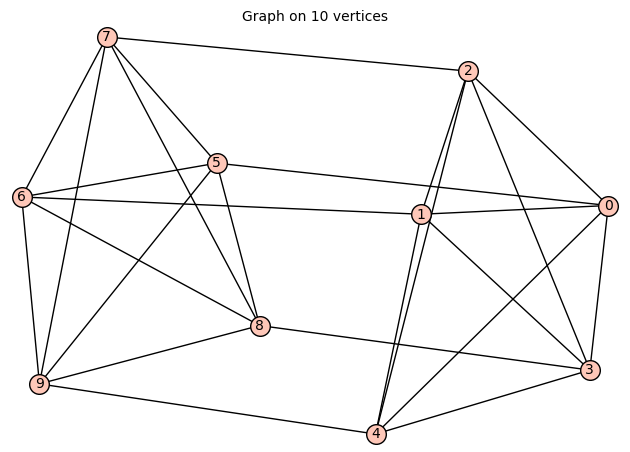

In [11]:
Graph(A_1)

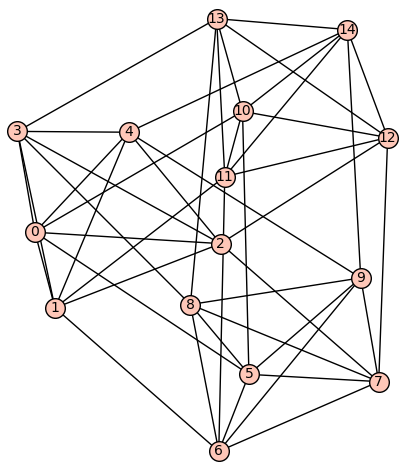

In [12]:
Graph(A_2).plot()

In [16]:
a1 = FYP_Graph(Graph(A_1))
a1.get_coherent_rank()
for i in a1.get_config_list():
    print(Matrix(i)*x)
    print()
    print()

[x 0 0 0 0 0 0 0 0 0]
[0 x 0 0 0 0 0 0 0 0]
[0 0 x 0 0 0 0 0 0 0]
[0 0 0 x 0 0 0 0 0 0]
[0 0 0 0 x 0 0 0 0 0]
[0 0 0 0 0 x 0 0 0 0]
[0 0 0 0 0 0 x 0 0 0]
[0 0 0 0 0 0 0 x 0 0]
[0 0 0 0 0 0 0 0 x 0]
[0 0 0 0 0 0 0 0 0 x]


[0 0 0 0 0 0 x x x x]
[0 0 0 0 0 x 0 x x x]
[0 0 0 0 0 x x 0 x x]
[0 0 0 0 0 x x x 0 x]
[0 0 0 0 0 x x x x 0]
[0 x x x x 0 0 0 0 0]
[x 0 x x x 0 0 0 0 0]
[x x 0 x x 0 0 0 0 0]
[x x x 0 x 0 0 0 0 0]
[x x x x 0 0 0 0 0 0]


[0 x x x x 0 0 0 0 0]
[x 0 x x x 0 0 0 0 0]
[x x 0 x x 0 0 0 0 0]
[x x x 0 x 0 0 0 0 0]
[x x x x 0 0 0 0 0 0]
[0 0 0 0 0 0 x x x x]
[0 0 0 0 0 x 0 x x x]
[0 0 0 0 0 x x 0 x x]
[0 0 0 0 0 x x x 0 x]
[0 0 0 0 0 x x x x 0]


[0 0 0 0 0 x 0 0 0 0]
[0 0 0 0 0 0 x 0 0 0]
[0 0 0 0 0 0 0 x 0 0]
[0 0 0 0 0 0 0 0 x 0]
[0 0 0 0 0 0 0 0 0 x]
[x 0 0 0 0 0 0 0 0 0]
[0 x 0 0 0 0 0 0 0 0]
[0 0 x 0 0 0 0 0 0 0]
[0 0 0 x 0 0 0 0 0 0]
[0 0 0 0 x 0 0 0 0 0]




In [18]:
J = Matrix(
    [
        [1,1,1],
        [1,1,1],
        [1,1,1]
    ]
)

I = Matrix(
    [
        [1,0,0],
        [0,1,0],
        [0,0,1]
    ]
)



In [19]:
(J-I)*(J-I)

[2 1 1]
[1 2 1]
[1 1 2]

In [21]:
a1 = FYP_Graph(Graph(A_2))
a1.get_coherent_rank()
for i in a1.get_config_list():
    print(Matrix(i)*x)
    print()
    print()

[x 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 x 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 x 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 x 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 x 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 x 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 x 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 x 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 x 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 x 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 x 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 x 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 x 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 x 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 x]


[0 0 0 0 0 0 x x x x 0 x x x x]
[0 0 0 0 0 x 0 x x x x 0 x x x]
[0 0 0 0 0 x x 0 x x x x 0 x x]
[0 0 0 0 0 x x x 0 x x x x 0 x]
[0 0 0 0 0 x x x x 0 x x x x 0]
[0 x x x x 0 0 0 0 0 0 x x x x]
[x 0 x x x 0 0 0 0 0 x 0 x x x]
[x x 0 x x 0 0 0 0 0 x x 0 x x]
[x x x 0 x 0 0 0 0 0 x x x 0 x]
[x x x x 0 0 0 0 0 0 x x x x 0]
[0 x x x x 0 x x x x 0 0 0 0 0]
[x 0 x x x x 0 x x x 0 0 0 0 0]
[x x 0 x x x x 0 x x 0 0 0 0 0]
[x x x 0 x x x x 0 x 0 0 0 0 0]
[x x x x 0 x x x x 0 0 0 0 0 0]


[0 0 0 0 0 x 0 0 0 0 x 0 0 0 0]
[0 0

In [27]:
b_2 = Matrix(a1.get_config_list()[3])
b_3 = Matrix(a1.get_config_list()[2])
b_4 = Matrix(a1.get_config_list()[1])

In [53]:
b_2*b_4  - (b_3 * (5-1)) - (b_4 * (5-2))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

In [38]:
b_4*b_2 - b_3 - (b_3 * (5-2)) - (b_4 * (5-2))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

In [42]:
b_3*b_4 - (b_4) - (2)*b_2

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

In [43]:
b_4*b_3 - (b_4) - (2)*b_2

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

In [47]:
a1.get_adjacency_matrix()

[0 1 1 1 1 1 0 0 0 0 1 0 0 0 0]
[1 0 1 1 1 0 1 0 0 0 0 1 0 0 0]
[1 1 0 1 1 0 0 1 0 0 0 0 1 0 0]
[1 1 1 0 1 0 0 0 1 0 0 0 0 1 0]
[1 1 1 1 0 0 0 0 0 1 0 0 0 0 1]
[1 0 0 0 0 0 1 1 1 1 1 0 0 0 0]
[0 1 0 0 0 1 0 1 1 1 0 1 0 0 0]
[0 0 1 0 0 1 1 0 1 1 0 0 1 0 0]
[0 0 0 1 0 1 1 1 0 1 0 0 0 1 0]
[0 0 0 0 1 1 1 1 1 0 0 0 0 0 1]
[1 0 0 0 0 1 0 0 0 0 0 1 1 1 1]
[0 1 0 0 0 0 1 0 0 0 1 0 1 1 1]
[0 0 1 0 0 0 0 1 0 0 1 1 0 1 1]
[0 0 0 1 0 0 0 0 1 0 1 1 1 0 1]
[0 0 0 0 1 0 0 0 0 1 1 1 1 1 0]

In [49]:
OA_Graph(2,3).get_adjacency_matrix()

[0 1 1 1 0 0 1 0 0]
[1 0 1 0 1 0 0 1 0]
[1 1 0 0 0 1 0 0 1]
[1 0 0 0 1 1 1 0 0]
[0 1 0 1 0 1 0 1 0]
[0 0 1 1 1 0 0 0 1]
[1 0 0 1 0 0 0 1 1]
[0 1 0 0 1 0 1 0 1]
[0 0 1 0 0 1 1 1 0]

In [54]:
for i in switched_graph.get_config_list():
    m = Matrix(i) * x
    print(m)
    print("-"*30)

[x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 x 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0

In [55]:
l =switched_graph.get_config_list()
##################################
w11, w12, w13, w14 = Matrix(l[0]), Matrix(l[11]), Matrix(l[10]), Matrix(l[5])

w21, w22, w23, w24 = Matrix(l[1]), Matrix(l[6]), Matrix(l[7]), Matrix(l[2])

w31, w32 = Matrix(l[3]), Matrix(l[8])

w41, w42 = Matrix(l[4]), Matrix(l[9])

In [64]:
w12 * w32 == 3*w32 + 4*w31

True

In [78]:
print(w42 * w13 == w41 * w14)

True


In [79]:
print(w42 * w14)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[4 3 3 3 3 4 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 4 3 3 3 3 4 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 3 4 3 3 3 3 4 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 3 3 4 3 3 3 3 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 3 3 3 4 3 3 3 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[4 3 3 3 3 4 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 4 3 3 3 3 4 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 3 4 3 3 3 3 4 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 3 3 4 3 3 3 3 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 3 3 3 4 3

In [80]:
print((2-1)*(5-2)*w42 + (2-1)*(5-1)*w41)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[4 3 3 3 3 4 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 4 3 3 3 3 4 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 3 4 3 3 3 3 4 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 3 3 4 3 3 3 3 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 3 3 3 4 3 3 3 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[4 3 3 3 3 4 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 4 3 3 3 3 4 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 3 4 3 3 3 3 4 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 3 3 4 3 3 3 3 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 3 3 3 4 3

In [85]:
print(w31*w41 == (5-2)*w13 + (5-2)*w11)

True


In [88]:
k = 1
print(f"Switching {k} blocks")
for n in range(5,20):
    print("-"*30) 
    print(f"n: {n}")
    graph = OA_Graph(3,n)
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()

Switching 1 blocks
------------------------------
n: 5
rank 20
[ 2  3]
[ 3 12]

------------------------------
n: 6
rank 68
[4 2 4 3]
[2 4 3 4]
[4 3 8 6]
[3 4 6 8]

------------------------------
n: 7
rank 34
[ 2  4]
[ 4 24]

------------------------------
n: 8
rank 90
[ 4  3  4  4]
[ 3  4  4  4]
[ 4  4  8  8]
[ 4  4  8 20]

------------------------------
n: 9
rank 75
[ 3  3  5]
[ 3  6 10]
[ 5 10 30]

------------------------------
n: 10
rank 144
[ 4  2  5  6]
[ 2  4  6  5]
[ 5  6 24 20]
[ 6  5 20 24]

------------------------------
n: 11
rank 74
[ 2  6]
[ 6 60]

------------------------------
n: 12
rank 288
[ 6  4  5  4  6  6]
[ 4  6  6  4  5  6]
[ 5  6 12  6 10 12]
[ 4  4  6 12  6 14]
[ 6  5 10  6 12 12]
[ 6  6 12 14 12 28]

------------------------------
n: 13
rank 100
[ 2  7]
[ 7 84]

------------------------------
n: 14
rank 252
[ 4  2  7  8]
[ 2  4  8  7]
[ 7  8 48 42]
[ 8  7 42 48]

------------------------------
n: 15
rank 248
[ 4  4  6  8]
[ 4  8  8 16]
[ 6  8 24 32]
[ 8 16 32

In [108]:
k = 2
print(f"Switching {k} blocks")
for n in range(5,20):
    print("-"*30) 
    print(f"n: {n}")
    graph = OA_Graph(3,n)
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()

Switching 2 blocks
------------------------------
n: 5
rank 39
[3 3 3]
[3 6 6]
[3 6 6]

------------------------------
n: 6
rank 63
[7 7 7]
[7 7 7]
[7 7 7]

------------------------------
n: 7
rank 100
[4 4 4 4]
[4 8 8 8]
[4 8 8 8]
[4 8 8 8]

------------------------------
n: 8
rank 144
[9 9 9 9]
[9 9 9 9]
[9 9 9 9]
[9 9 9 9]

------------------------------
n: 9
rank 205
[ 5  5  5  5  5]
[ 5 10 10 10 10]
[ 5 10 10 10 10]
[ 5 10 10 10 10]
[ 5 10 10 10 10]

------------------------------
n: 10
rank 275
[11 11 11 11 11]
[11 11 11 11 11]
[11 11 11 11 11]
[11 11 11 11 11]
[11 11 11 11 11]

------------------------------
n: 11
rank 366
[ 6  6  6  6  6  6]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]

------------------------------
n: 12
rank 468
[13 13 13 13 13 13]
[13 13 13 13 13 13]
[13 13 13 13 13 13]
[13 13 13 13 13 13]
[13 13 13 13 13 13]
[13 13 13 13 13 13]

------------------------------
n: 13
rank 595
[ 7  7  7  7  7  7  7]
[ 7 1

In [110]:
k = 3
print(f"Switching {k} blocks")
for n in range(5,20):
    print("-"*30) 
    print(f"n: {n}")
    graph = OA_Graph(3,n)
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()

Switching 3 blocks
------------------------------
n: 5
rank 39
[3 3 3]
[3 6 6]
[3 6 6]

------------------------------
n: 6
rank 3
[3]

------------------------------
n: 7
rank 100
[4 4 4 4]
[4 8 8 8]
[4 8 8 8]
[4 8 8 8]

------------------------------
n: 8
rank 150
[ 5  3  4  5  4]
[ 3  5  4  5  4]
[ 4  4 10  8 10]
[ 5  5  8 10  8]
[ 4  4 10  8 10]

------------------------------
n: 9
rank 205
[ 5  5  5  5  5]
[ 5 10 10 10 10]
[ 5 10 10 10 10]
[ 5 10 10 10 10]
[ 5 10 10 10 10]

------------------------------
n: 10
rank 282
[ 6  3  5  6  6  5]
[ 3  6  6  5  5  6]
[ 5  6 12 10 10 12]
[ 6  5 10 12 12 10]
[ 6  5 10 12 12 10]
[ 5  6 12 10 10 12]

------------------------------
n: 11
rank 366
[ 6  6  6  6  6  6]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]

------------------------------
n: 12
rank 476
[ 7  4  6  6  7  6  7]
[ 4  7  6  6  7  6  7]
[ 6  6 14 14 12 14 12]
[ 6  6 14 14 12 14 12]
[ 7  7 12 12 14 12 14]
[ 6  6 14 14 12 14 12

In [118]:
n = 5
print(f"n: {n}")
for k in range(n//2 +1):
    print("-"*30) 
    print(f"Switching {k} blocks")
    graph = OA_Graph(3,n)
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()

n: 5
------------------------------
Switching 0 blocks
rank 3
[3]

------------------------------
Switching 1 blocks
rank 20
[ 2  3]
[ 3 12]

------------------------------
Switching 2 blocks
rank 39
[3 3 3]
[3 6 6]
[3 6 6]



In [119]:
n = 6
print(f"n: {n}")
for k in range(n//2 +1):
    print("-"*30) 
    print(f"Switching {k} blocks")
    graph = OA_Graph(3,n)
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()

n: 6
------------------------------
Switching 0 blocks
rank 3
[3]

------------------------------
Switching 1 blocks
rank 68
[4 2 3 4]
[2 4 4 3]
[3 4 8 6]
[4 3 6 8]

------------------------------
Switching 2 blocks
rank 63
[7 7 7]
[7 7 7]
[7 7 7]

------------------------------
Switching 3 blocks
rank 3
[3]



In [121]:
n = 7
print(f"n: {n}")
for k in range(n//2 +1):
    print("-"*30) 
    print(f"Switching {k} blocks")
    graph = OA_Graph(3,n)
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()

n: 7
------------------------------
Switching 0 blocks
rank 3
[3]

------------------------------
Switching 1 blocks
rank 34
[ 2  4]
[ 4 24]

------------------------------
Switching 2 blocks
rank 100
[4 4 4 4]
[4 8 8 8]
[4 8 8 8]
[4 8 8 8]

------------------------------
Switching 3 blocks
rank 100
[4 4 4 4]
[4 8 8 8]
[4 8 8 8]
[4 8 8 8]



In [122]:
n = 8
print(f"n: {n}")
for k in range(n//2 +1):
    print("-"*30) 
    print(f"Switching {k} blocks")
    graph = OA_Graph(3,n)
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()

n: 8
------------------------------
Switching 0 blocks
rank 3
[3]

------------------------------
Switching 1 blocks
rank 90
[ 4  3  4  4]
[ 3  4  4  4]
[ 4  4  8  8]
[ 4  4  8 20]

------------------------------
Switching 2 blocks
rank 144
[9 9 9 9]
[9 9 9 9]
[9 9 9 9]
[9 9 9 9]

------------------------------
Switching 3 blocks
rank 150
[ 5  3  4  4  5]
[ 3  5  4  4  5]
[ 4  4 10 10  8]
[ 4  4 10 10  8]
[ 5  5  8  8 10]

------------------------------
Switching 4 blocks
rank 72
[18 18]
[18 18]



In [123]:
n = 9
print(f"n: {n}")
for k in range(n//2 +1):
    print("-"*30) 
    print(f"Switching {k} blocks")
    graph = OA_Graph(3,n)
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()

n: 9
------------------------------
Switching 0 blocks
rank 3
[3]

------------------------------
Switching 1 blocks
rank 75
[ 3  3  5]
[ 3  6 10]
[ 5 10 30]

------------------------------
Switching 2 blocks
rank 205
[ 5  5  5  5  5]
[ 5 10 10 10 10]
[ 5 10 10 10 10]
[ 5 10 10 10 10]
[ 5 10 10 10 10]

------------------------------
Switching 3 blocks
rank 205
[ 5  5  5  5  5]
[ 5 10 10 10 10]
[ 5 10 10 10 10]
[ 5 10 10 10 10]
[ 5 10 10 10 10]

------------------------------
Switching 4 blocks
rank 205
[ 5  5  5  5  5]
[ 5 10 10 10 10]
[ 5 10 10 10 10]
[ 5 10 10 10 10]
[ 5 10 10 10 10]



In [124]:
n = 10
print(f"n: {n}")
for k in range(n//2 +1):
    print("-"*30) 
    print(f"Switching {k} blocks")
    graph = OA_Graph(3,n)
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()

n: 10
------------------------------
Switching 0 blocks
rank 3
[3]

------------------------------
Switching 1 blocks
rank 144
[ 4  2  6  5]
[ 2  4  5  6]
[ 6  5 24 20]
[ 5  6 20 24]

------------------------------
Switching 2 blocks
rank 275
[11 11 11 11 11]
[11 11 11 11 11]
[11 11 11 11 11]
[11 11 11 11 11]
[11 11 11 11 11]

------------------------------
Switching 3 blocks
rank 282
[ 6  3  5  5  6  6]
[ 3  6  6  6  5  5]
[ 5  6 12 12 10 10]
[ 5  6 12 12 10 10]
[ 6  5 10 10 12 12]
[ 6  5 10 10 12 12]

------------------------------
Switching 4 blocks
rank 275
[11 11 11 11 11]
[11 11 11 11 11]
[11 11 11 11 11]
[11 11 11 11 11]
[11 11 11 11 11]

------------------------------
Switching 5 blocks
rank 141
[ 9 11 11]
[11 22 22]
[11 22 22]



In [125]:
# Odd n, show k>1 leads to convergence in type matrix (rank)
n = 11
print(f"n: {n}")
for k in range(n//2 +1):
    print("-"*30) 
    print(f"Switching {k} blocks")
    graph = OA_Graph(3,n)
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()

n: 11
------------------------------
Switching 0 blocks
rank 3
[3]

------------------------------
Switching 1 blocks
rank 74
[ 2  6]
[ 6 60]

------------------------------
Switching 2 blocks
rank 366
[ 6  6  6  6  6  6]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]

------------------------------
Switching 3 blocks
rank 366
[ 6  6  6  6  6  6]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]

------------------------------
Switching 4 blocks
rank 366
[ 6  6  6  6  6  6]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]

------------------------------
Switching 5 blocks
rank 366
[ 6  6  6  6  6  6]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]



In [ ]:
# Even n
n = 20
print(f"n: {n}")
for k in range(n//2 +1):
    print("-"*30) 
    print(f"Switching {k} blocks")
    graph = OA_Graph(3,n)
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()

n: 20
------------------------------
Switching 0 blocks
rank 3
[3]

------------------------------
Switching 1 blocks
rank 624
[ 6  4  4  9  8 10]
[ 4  6  4  8  9 10]
[ 4  4 12 10 10 22]
[ 9  8 10 36 32 40]
[ 8  9 10 32 36 40]
[10 10 22 40 40 88]

------------------------------
Switching 2 blocks
rank 2100
[21 21 21 21 21 21 21 21 21 21]
[21 21 21 21 21 21 21 21 21 21]
[21 21 21 21 21 21 21 21 21 21]
[21 21 21 21 21 21 21 21 21 21]
[21 21 21 21 21 21 21 21 21 21]
[21 21 21 21 21 21 21 21 21 21]
[21 21 21 21 21 21 21 21 21 21]
[21 21 21 21 21 21 21 21 21 21]
[21 21 21 21 21 21 21 21 21 21]
[21 21 21 21 21 21 21 21 21 21]

------------------------------
Switching 3 blocks
rank 2112
[11  6 10 10 11 10 10 11 11 11 10]
[ 6 11 10 10 11 10 10 11 11 11 10]
[10 10 22 22 20 22 22 20 20 20 22]
[10 10 22 22 20 22 22 20 20 20 22]
[11 11 20 20 22 20 20 22 22 22 20]
[10 10 22 22 20 22 22 20 20 20 22]
[10 10 22 22 20 22 22 20 20 20 22]
[11 11 20 20 22 20 20 22 22 22 20]
[11 11 20 20 22 20 20 22 22 22 

In [ ]:
# Prime n, switch 1 block
k = 1
P = Primes()
print(f"Switching {k} blocks")
for i in range(10):
    n = P.unrank(i)
    print("-"*30) 
    print(f"n: {n}")
    graph = OA_Graph(3,n)
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()

In [112]:
print("-"*30) 
n=6
k=3
print(f"n: {n}")
graph = OA_Graph(3,n)
k = n // 2
print(f"Switching {k} blocks")
switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
print(switched_graph.get_coherent_rank())
print(switched_graph.get_type_matrix())
print()

------------------------------
n: 6
Switching 3 blocks
rank 3
[3]



In [117]:
switched_graph.obj.is_strongly_regular()

True

In [94]:
k = 1
print(f"Switching {k} blocks")
n=5
print("-"*30) 
print(f"n: {n}")
graph = OA_Graph(3,n)
switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
print(switched_graph.get_coherent_rank())
print(switched_graph.get_type_matrix())
print()
print(graph.get_adjacency_matrix())
print()
print(switched_graph.final_config_matrix)

Switching 1 blocks
------------------------------
n: 5
rank 20
[ 2  3]
[ 3 12]

[0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0]
[1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0]
[1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0]
[1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1]
[1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1]
[1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0]
[0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0]
[0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1]
[0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0]
[1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1]
[1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0]
[0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1]
[0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0]
[1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0]
[0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1]
[1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1]
[0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0]
[1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0

In [95]:
graph.obj.vertices()

[(0, 0, 0),
 (0, 1, 1),
 (0, 2, 2),
 (0, 3, 3),
 (0, 4, 4),
 (1, 0, 1),
 (1, 1, 2),
 (1, 2, 3),
 (1, 3, 4),
 (1, 4, 0),
 (2, 0, 2),
 (2, 1, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 4, 1),
 (3, 0, 3),
 (3, 1, 4),
 (3, 2, 0),
 (3, 3, 1),
 (3, 4, 2),
 (4, 0, 4),
 (4, 1, 0),
 (4, 2, 1),
 (4, 3, 2),
 (4, 4, 3)]

In [100]:
m = OA_Graph(3,4)
Matrix(m.obj.vertices()).T

[0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]
[0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3]
[0 1 2 3 1 2 3 0 2 3 0 1 3 0 1 2]

In [101]:
m.get_adjacency_matrix()

[0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0]
[1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0]
[1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1]
[1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1]
[1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0]
[0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1]
[0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0]
[1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1]
[1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1]
[0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0]
[1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0]
[0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1]
[1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1]
[1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1]
[0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1]
[0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0]

In [106]:
print(OA_Graph(3,5).get_adjacency_matrix())

[0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0]
[1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0]
[1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0]
[1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1]
[1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1]
[1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0]
[0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0]
[0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1]
[0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0]
[1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1]
[1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0]
[0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1]
[0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0]
[1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0]
[0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1]
[1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1]
[0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0]
[1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0]
[0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0]
[0 0 1 0 1 0

In [107]:
print(OA_Graph(3,6).get_adjacency_matrix())

[0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0]
[1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0]
[1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0]
[1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0]
[1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1]
[1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1]
[1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0]
[0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0]
[0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0]
[0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1]
[0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0]
[1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1]
[1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0]
[0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1

In [3]:
n = 4
k = n//2

print("-"*30) 
print(f"Switching {k} blocks")
graph = OA_Graph(3,n)
switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
print(switched_graph.get_coherent_rank())
print(switched_graph.get_type_matrix())
print()

------------------------------
Switching 2 blocks
rank 3
[3]



In [4]:
n = 6
k = n//2

print("-"*30) 
print(f"Switching {k} blocks")
graph = OA_Graph(3,n)
switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
print(switched_graph.get_coherent_rank())
print(switched_graph.get_type_matrix())
print()

------------------------------
Switching 3 blocks
rank 3
[3]



In [5]:
n = 8
k = n//2

print("-"*30) 
print(f"Switching {k} blocks")
graph = OA_Graph(3,n)
switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
print(switched_graph.get_coherent_rank())
print(switched_graph.get_type_matrix())
print()

------------------------------
Switching 4 blocks
rank 72
[18 18]
[18 18]



In [7]:
for n in range(4,15,2):
    k = n//2
    
    print("-"*30) 
    print(f"Switching {k} blocks")
    graph = OA_Graph(2,n)
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()

------------------------------
Switching 2 blocks
rank 3
[3]

------------------------------
Switching 3 blocks
rank 6
[6]

------------------------------
Switching 4 blocks
rank 6
[6]

------------------------------
Switching 5 blocks
rank 6
[6]

------------------------------
Switching 6 blocks
rank 6
[6]

------------------------------
Switching 7 blocks
rank 6
[6]



In [48]:
n=4
k = n//2
    
print("-"*30) 
print(f"Switching {k} blocks")
graph = OA_Graph(2,n)
switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
print(switched_graph.get_coherent_rank())
print(switched_graph.get_type_matrix())
print()

------------------------------
Switching 2 blocks
rank 3
[3]



In [49]:
adj = switched_graph.obj.adjacency_matrix()
adj = list(adj)
adj

[(0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1),
 (1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1),
 (1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1),
 (1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0),
 (1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1),
 (0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1),
 (0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1),
 (0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0),
 (0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0),
 (1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0),
 (1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0),
 (1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1),
 (0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1),
 (1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1),
 (1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1),
 (1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0)]

In [50]:
count = {
    "neighbour": 0,
    "non-neighbour": 0
}

neighbour_idx, non_neighbour_idx = -1,-1
for j in range(1,len(adj[0])):
    if neighbour_idx == -1 and adj[0][j] == 1:
        neighbour_idx = j
    if non_neighbour_idx == -1 and adj[0][j] == 0:
        non_neighbour_idx = j
        
for j in range(len(adj[0])):
    if adj[0][j] == 1 and adj[non_neighbour_idx][j] == 1:
        count['non-neighbour'] += 1
    if adj[0][j] == 1 and adj[neighbour_idx][j] == 1:
        count['neighbour'] += 1

count

{'neighbour': 6, 'non-neighbour': 6}

In [53]:
adj = Matrix(adj)
adj * adj

[10  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6]
[ 6 10  6  6  6  6  6  6  6  6  6  6  6  6  6  6]
[ 6  6 10  6  6  6  6  6  6  6  6  6  6  6  6  6]
[ 6  6  6 10  6  6  6  6  6  6  6  6  6  6  6  6]
[ 6  6  6  6 10  6  6  6  6  6  6  6  6  6  6  6]
[ 6  6  6  6  6 10  6  6  6  6  6  6  6  6  6  6]
[ 6  6  6  6  6  6 10  6  6  6  6  6  6  6  6  6]
[ 6  6  6  6  6  6  6 10  6  6  6  6  6  6  6  6]
[ 6  6  6  6  6  6  6  6 10  6  6  6  6  6  6  6]
[ 6  6  6  6  6  6  6  6  6 10  6  6  6  6  6  6]
[ 6  6  6  6  6  6  6  6  6  6 10  6  6  6  6  6]
[ 6  6  6  6  6  6  6  6  6  6  6 10  6  6  6  6]
[ 6  6  6  6  6  6  6  6  6  6  6  6 10  6  6  6]
[ 6  6  6  6  6  6  6  6  6  6  6  6  6 10  6  6]
[ 6  6  6  6  6  6  6  6  6  6  6  6  6  6 10  6]
[ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6 10]

In [65]:
for n in range(6, 31,2):
    k = n//2
        
    print("-"*30) 
    print(f"Switching {k} blocks on OA(2,{n})")
    graph = OA_Graph(2,n)
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()

------------------------------
Switching 3 blocks on OA(2,6)
rank 6
[6]

------------------------------
Switching 4 blocks on OA(2,8)
rank 6
[6]

------------------------------
Switching 5 blocks on OA(2,10)
rank 6
[6]

------------------------------
Switching 6 blocks on OA(2,12)
rank 6
[6]

------------------------------
Switching 7 blocks on OA(2,14)
rank 6
[6]

------------------------------
Switching 8 blocks on OA(2,16)
rank 6
[6]

------------------------------
Switching 9 blocks on OA(2,18)
rank 6
[6]

------------------------------
Switching 10 blocks on OA(2,20)
rank 6
[6]

------------------------------
Switching 11 blocks on OA(2,22)
rank 6
[6]

------------------------------
Switching 12 blocks on OA(2,24)
rank 6
[6]

------------------------------
Switching 13 blocks on OA(2,26)
rank 6
[6]

------------------------------
Switching 14 blocks on OA(2,28)
rank 6
[6]

------------------------------
Switching 15 blocks on OA(2,30)
rank 6
[6]



In [55]:
n=6
k = n//2
        
print("-"*30) 
print(f"Switching {k} blocks")
graph = OA_Graph(2,n)
switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
print(switched_graph.get_coherent_rank())
print(switched_graph.get_type_matrix())
print()

------------------------------
Switching 3 blocks
rank 6
[6]



In [58]:
print(switched_graph.final_config_matrix)

[0 5 5 5 5 5 4 1 1 1 1 1 4 1 1 1 1 1 2 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3]
[5 0 5 5 5 5 1 4 1 1 1 1 1 4 1 1 1 1 3 2 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3]
[5 5 0 5 5 5 1 1 4 1 1 1 1 1 4 1 1 1 3 3 2 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3]
[5 5 5 0 5 5 1 1 1 4 1 1 1 1 1 4 1 1 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3 2 3 3]
[5 5 5 5 0 5 1 1 1 1 4 1 1 1 1 1 4 1 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3 2 3]
[5 5 5 5 5 0 1 1 1 1 1 4 1 1 1 1 1 4 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3 2]
[4 1 1 1 1 1 0 5 5 5 5 5 4 1 1 1 1 1 2 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3]
[1 4 1 1 1 1 5 0 5 5 5 5 1 4 1 1 1 1 3 2 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3]
[1 1 4 1 1 1 5 5 0 5 5 5 1 1 4 1 1 1 3 3 2 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3]
[1 1 1 4 1 1 5 5 5 0 5 5 1 1 1 4 1 1 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3 2 3 3]
[1 1 1 1 4 1 5 5 5 5 0 5 1 1 1 1 4 1 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3 2 3]
[1 1 1 1 1 4 5 5 5 5 5 0 1 1 1 1 1 4 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3 2]
[4 1 1 1 1 1 4 1 1 1 1 1 0 5 5 5 5 5 2 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3]
[1 4 1 1 1 1 1 4 1 1 1 1 5 0 5 5 5 5 3

In [62]:
for i in switched_graph.get_config_list():
    print(Matrix(i))
    print()

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0

In [63]:
n=4
k = n//2
        
print("-"*30) 
print(f"Switching {k} blocks")
graph = OA_Graph(2,n)
switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
print(switched_graph.get_coherent_rank())
print(switched_graph.get_type_matrix())
print()

for i in switched_graph.get_config_list():
    print(Matrix(i))
    print()

------------------------------
Switching 2 blocks
rank 3
[3]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]

[0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0]
[0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0]
[0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0]
[0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1]
[0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0]
[1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0]
[1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0]
[1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1]
[1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1]
[0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1]
[0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1]
[0 0 0 1 0 0 0 1 0 

In [80]:
for n in range(4, 10):
    k = n//2
        
    print("-"*30) 
    # print(f"Switching {k} blocks on OA(2,{n})")
    print(f"Switching 1 vertex on OA(3,{n})")
    graph = OA_Graph(3,n)
    switched_graph = graph.switch_graph_edges([0])
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()

------------------------------
Switching 1 vertex on OA(3,4)
rank 31
[1 1 1 1]
[1 2 2 2]
[1 2 4 3]
[1 2 3 4]

------------------------------
Switching 1 vertex on OA(3,5)
rank 33
[1 1 1]
[1 8 6]
[1 6 8]

------------------------------
Switching 1 vertex on OA(3,6)
rank 129
[ 1  1  1  1  1  1  1]
[ 1  2  1  2  1  1  2]
[ 1  1  2  2  2  2  3]
[ 1  2  2  4  3  3  6]
[ 1  1  2  3  4  4  6]
[ 1  1  2  3  4  4  6]
[ 1  2  3  6  6  6 12]

------------------------------
Switching 1 vertex on OA(3,7)
rank 81
[ 1  1  1  1]
[ 1  8  6  6]
[ 1  6 12  9]
[ 1  6  9 12]

------------------------------
Switching 1 vertex on OA(3,8)
rank 215
[1 1 1 1 1 1 1 1]
[1 2 2 2 2 2 2 2]
[1 2 4 3 4 3 3 4]
[1 2 3 4 3 4 4 3]
[1 2 4 3 8 6 6 6]
[1 2 3 4 6 8 6 6]
[1 2 3 4 6 6 8 6]
[1 2 4 3 6 6 6 8]

------------------------------
Switching 1 vertex on OA(3,9)
rank 205
[ 1  1  1  1  1  1]
[ 1  2  1  2  1  2]
[ 1  1  4  3  4  6]
[ 1  2  3 12  9 18]
[ 1  1  4  9 12 18]
[ 1  2  6 18 18 36]



In [81]:
for n in range(4, 10):
    k = n//2
        
    print("-"*30) 
    # print(f"Switching {k} blocks on OA(2,{n})")
    print(f"Deleting 1 vertex on OA(3,{n})")
    graph = OA_Graph(3,n)
    switched_graph = graph.delete_vertices([0])
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()

------------------------------
Deleting 1 vertex on OA(3,4)
rank 24
[2 2 2]
[2 4 3]
[2 3 4]

------------------------------
Deleting 1 vertex on OA(3,5)
rank 28
[8 6]
[6 8]

------------------------------
Deleting 1 vertex on OA(3,6)
rank 116
[ 2  1  2  2  2  3]
[ 1  2  1  1  2  2]
[ 2  1  4  4  3  6]
[ 2  1  4  4  3  6]
[ 2  2  3  3  4  6]
[ 3  2  6  6  6 12]

------------------------------
Deleting 1 vertex on OA(3,7)
rank 74
[ 8  6  6]
[ 6 12  9]
[ 6  9 12]

------------------------------
Deleting 1 vertex on OA(3,8)
rank 200
[2 2 2 2 2 2 2]
[2 4 3 4 4 3 3]
[2 3 4 3 3 4 4]
[2 4 3 8 6 6 6]
[2 4 3 6 8 6 6]
[2 3 4 6 6 8 6]
[2 3 4 6 6 6 8]

------------------------------
Deleting 1 vertex on OA(3,9)
rank 194
[ 2  1  1  2  2]
[ 1  4  4  3  6]
[ 1  4 12  9 18]
[ 2  3  9 12 18]
[ 2  6 18 18 36]



In [82]:
for n in range(4, 10):
    k = 1
        
    print("-"*30) 
    print(f"Switching {k} blocks on OA(3,{n})")
    # print(f"Deleting 1 vertex on OA(3,{n})")
    graph = OA_Graph(3,n)
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()

------------------------------
Switching 1 blocks on OA(3,4)
rank 3
[3]

------------------------------
Switching 1 blocks on OA(3,5)
rank 20
[ 2  3]
[ 3 12]

------------------------------
Switching 1 blocks on OA(3,6)
rank 68
[4 2 3 4]
[2 4 4 3]
[3 4 8 6]
[4 3 6 8]

------------------------------
Switching 1 blocks on OA(3,7)
rank 34
[ 2  4]
[ 4 24]

------------------------------
Switching 1 blocks on OA(3,8)
rank 90
[ 4  3  4  4]
[ 3  4  4  4]
[ 4  4  8  8]
[ 4  4  8 20]

------------------------------
Switching 1 blocks on OA(3,9)
rank 75
[ 3  3  5]
[ 3  6 10]
[ 5 10 30]



In [83]:
P = Primes()

for i in range(10):
    n = P.unrank(i)
    k=1
    print("-"*30) 
    print(f"Switching {k} blocks on OA(3,{n})")
    # print(f"Deleting 1 vertex on OA(3,{n})")
    graph = OA_Graph(3,n)
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()

------------------------------
Switching 1 blocks on OA(3,2)
rank 3
[3]

------------------------------
Switching 1 blocks on OA(3,3)
rank 9
[2 2]
[2 3]

------------------------------
Switching 1 blocks on OA(3,5)
rank 20
[ 2  3]
[ 3 12]

------------------------------
Switching 1 blocks on OA(3,7)
rank 34
[ 2  4]
[ 4 24]

------------------------------
Switching 1 blocks on OA(3,11)
rank 74
[ 2  6]
[ 6 60]

------------------------------
Switching 1 blocks on OA(3,13)
rank 100
[ 2  7]
[ 7 84]

------------------------------
Switching 1 blocks on OA(3,17)
rank 164
[  2   9]
[  9 144]

------------------------------
Switching 1 blocks on OA(3,19)
rank 202
[  2  10]
[ 10 180]

------------------------------
Switching 1 blocks on OA(3,23)
rank 290
[  2  12]
[ 12 264]

------------------------------
Switching 1 blocks on OA(3,29)
rank 452
[  2  15]
[ 15 420]



In [2]:
n=5
k = 1
    
print("-"*30) 
print(f"n: {n}")
graph = OA_Graph(2,n)

print(f"Deleting 1 vertex of n vertices")
deleted_graph = graph.delete_vertices([i for i in range(k)])
print(deleted_graph.get_coherent_rank())
print(deleted_graph.get_type_matrix())
print()

------------------------------
n: 5
Deleting 1 vertex of n vertices
rank 10
[3 2]
[2 3]



In [3]:
deleted_graph.get_blocks()

[
[0 1 1 1 0 0 0 0]  [1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
[1 0 1 1 0 0 0 0]  [0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0]
[1 1 0 1 0 0 0 0]  [0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0]
[1 1 1 0 0 0 0 0]  [0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1]
[0 0 0 0 0 1 1 1]  [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 1 1]  [0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 0 1]  [0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0]
[0 0 0 0 1 1 1 0], [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1],

[1 0 0 0 1 0 0 0]  [0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0]
[0 1 0 0 1 0 0 0]  [1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0]
[0 0 1 0 1 0 0 0]  [1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0]
[0 0 0 1 1 0 0 0]  [1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1]
[1 0 0 0 0 1 0 0]  [1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0]
[0 1 0 0 0 1 0 0]  [0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0]
[0 0 1 0 0 1 0 0]  [0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0]
[0 0 0 1 0 1 0 0]  [0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1]
[1 0 0 0 0 0 1 0]  [1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0]
[0 1 0 0 0 0 1 0]  [0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0]
[0 0 1 0 0 0 1 0]  [0 0 1 0 0 0 1 0 1 1 0 

In [6]:
for i in deleted_graph.get_config_list():
    print(Matrix(i))
    print()

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [93]:
for n in range(4, 16):
    print("=-="*30) 
    print(f"Operations on OA(3,{n})")
    graph = OA_Graph(3,n)

    for k in range(1,n//2+1):
        
        switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
        print(f"Switching {k} blocks")
        print(switched_graph.get_coherent_rank())
        print(switched_graph.get_type_matrix())
        print()


=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on OA(3,4)
Switching 1 blocks
rank 3
[3]

Switching 2 blocks
rank 3
[3]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on OA(3,5)
Switching 1 blocks
rank 20
[ 2  3]
[ 3 12]

Switching 2 blocks
rank 39
[3 3 3]
[3 6 6]
[3 6 6]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on OA(3,6)
Switching 1 blocks
rank 68
[4 2 3 4]
[2 4 4 3]
[3 4 8 6]
[4 3 6 8]

Switching 2 blocks
rank 63
[7 7 7]
[7 7 7]
[7 7 7]

Switching 3 blocks
rank 3
[3]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on OA(3,7)
Switching 1 blocks
rank 34
[ 2  4]
[ 4 24]

Switching 2 blocks
rank 100
[4 4 4 4]
[4 8 8 8]
[4 8 8 8]
[4 8 8 8]

Switching 3 blocks
rank 100
[4 4 4 4]
[4 8 8 8]
[4 8 8 8]
[4 8 8 8]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=

In [96]:
for n in range(4, 16,2):
    print("=-="*30) 
    print(f"Operations on OA(3,{n})")
    graph = OA_Graph(3,n)

    for k in range(1,n//2+1,2):
        switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
        print(f"Switching odd {k} blocks")
        print(switched_graph.get_coherent_rank())
        print(switched_graph.get_type_matrix())
        print()

    for k in range(2,n//2+1,2):
        switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
        print(f"Switching even {k} blocks")
        print(switched_graph.get_coherent_rank())
        print(switched_graph.get_type_matrix())
        print()


=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on OA(3,4)
Switching odd 1 blocks
rank 3
[3]

Switching even 2 blocks
rank 3
[3]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on OA(3,6)
Switching odd 1 blocks
rank 68
[4 2 4 3]
[2 4 3 4]
[4 3 8 6]
[3 4 6 8]

Switching odd 3 blocks
rank 3
[3]

Switching even 2 blocks
rank 63
[7 7 7]
[7 7 7]
[7 7 7]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on OA(3,8)
Switching odd 1 blocks
rank 90
[ 4  3  4  4]
[ 3  4  4  4]
[ 4  4  8  8]
[ 4  4  8 20]

Switching odd 3 blocks
rank 150
[ 5  3  4  5  4]
[ 3  5  4  5  4]
[ 4  4 10  8 10]
[ 5  5  8 10  8]
[ 4  4 10  8 10]

Switching even 2 blocks
rank 144
[9 9 9 9]
[9 9 9 9]
[9 9 9 9]
[9 9 9 9]

Switching even 4 blocks
rank 72
[18 18]
[18 18]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operat

In [94]:
for n in range(4, 16,2):
    print("=-="*30) 
    print(f"Operations on OA(3,{n})")
    graph = OA_Graph(3,n)

    k = n//2
        
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    print(f"Switching {k} blocks")
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()


=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on OA(3,4)
Switching 2 blocks
rank 3
[3]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on OA(3,6)
Switching 3 blocks
rank 3
[3]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on OA(3,8)
Switching 4 blocks
rank 72
[18 18]
[18 18]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on OA(3,10)
Switching 5 blocks
rank 141
[ 9 11 11]
[11 22 22]
[11 22 22]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on OA(3,12)
Switching 6 blocks
rank 234
[26 26 26]
[26 26 26]
[26 26 26]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on OA(3,14)
Switching 7 blocks
rank 372
[12 15 15 15]
[15 30 30 30]
[15 30 30 30]
[15 30 30 30]



In [98]:
n = 5

print("=-="*30) 
print(f"Operations on OA(2,{n})")
graph = OA_Graph(2,n)

k = 2
    
switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
print(f"Switching {k} blocks")
print(switched_graph.get_coherent_rank())
print(switched_graph.get_type_matrix())
print()

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on OA(2,5)
Switching 2 blocks
rank 12
[4 2]
[2 4]



In [100]:
a = switched_graph.get_adjacency_matrix()
print(a*a)

[17 12 12 12 12 12 11 11 11 11  8  9  9  9  9  8  9  9  9  9  8  9  9  9  9]
[12 17 12 12 12 11 12 11 11 11  9  8  9  9  9  9  8  9  9  9  9  8  9  9  9]
[12 12 17 12 12 11 11 12 11 11  9  9  8  9  9  9  9  8  9  9  9  9  8  9  9]
[12 12 12 17 12 11 11 11 12 11  9  9  9  8  9  9  9  9  8  9  9  9  9  8  9]
[12 12 12 12 17 11 11 11 11 12  9  9  9  9  8  9  9  9  9  8  9  9  9  9  8]
[12 11 11 11 11 17 12 12 12 12  8  9  9  9  9  8  9  9  9  9  8  9  9  9  9]
[11 12 11 11 11 12 17 12 12 12  9  8  9  9  9  9  8  9  9  9  9  8  9  9  9]
[11 11 12 11 11 12 12 17 12 12  9  9  8  9  9  9  9  8  9  9  9  9  8  9  9]
[11 11 11 12 11 12 12 12 17 12  9  9  9  8  9  9  9  9  8  9  9  9  9  8  9]
[11 11 11 11 12 12 12 12 12 17  9  9  9  9  8  9  9  9  9  8  9  9  9  9  8]
[ 8  9  9  9  9  8  9  9  9  9 14  9  9  9  9  9  8  8  8  8  9  8  8  8  8]
[ 9  8  9  9  9  9  8  9  9  9  9 14  9  9  9  8  9  8  8  8  8  9  8  8  8]
[ 9  9  8  9  9  9  9  8  9  9  9  9 14  9  9  8  8  9  8  8  8  8  9  8  8]

In [102]:
print(a)

[0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
[1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1]
[1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1]
[1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1]
[1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0]
[1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
[0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1]
[0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1]
[0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1]
[0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0]
[0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0]
[1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0]
[1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0]
[1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0]
[1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1]
[0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0]
[1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0]
[1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0]
[1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0]
[1 1 1 1 0 1

In [103]:
print(a*a*a)

[168 169 169 169 169 169 162 162 162 162 144 151 151 151 151 144 151 151 151 151 144 151 151 151 151]
[169 168 169 169 169 162 169 162 162 162 151 144 151 151 151 151 144 151 151 151 151 144 151 151 151]
[169 169 168 169 169 162 162 169 162 162 151 151 144 151 151 151 151 144 151 151 151 151 144 151 151]
[169 169 169 168 169 162 162 162 169 162 151 151 151 144 151 151 151 151 144 151 151 151 151 144 151]
[169 169 169 169 168 162 162 162 162 169 151 151 151 151 144 151 151 151 151 144 151 151 151 151 144]
[169 162 162 162 162 168 169 169 169 169 144 151 151 151 151 144 151 151 151 151 144 151 151 151 151]
[162 169 162 162 162 169 168 169 169 169 151 144 151 151 151 151 144 151 151 151 151 144 151 151 151]
[162 162 169 162 162 169 169 168 169 169 151 151 144 151 151 151 151 144 151 151 151 151 144 151 151]
[162 162 162 169 162 169 169 169 168 169 151 151 151 144 151 151 151 151 144 151 151 151 151 144 151]
[162 162 162 162 169 169 169 169 169 168 151 151 151 151 144 151 151 151 151 144 1

In [109]:
for n in range(3,20):
    print("=-="*30) 
    print(f"Operations on T({n})")
    graph = Triangle_Graph(n)

    k=1
    switched_graph = graph.switch_graph_edges([i for i in range(k)])
    print(f"Switching {k} vertex")
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()


=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on T(3)
Switching 1 vertex
rank 5
[1 1]
[1 2]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on T(4)
Switching 1 vertex
rank 11
[1 1 1]
[1 1 1]
[1 1 3]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on T(5)
Switching 1 vertex
rank 15
[1 1 1]
[1 2 2]
[1 2 4]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on T(6)
Switching 1 vertex
rank 16
[1 1 1]
[1 3 2]
[1 2 4]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on T(7)
Switching 1 vertex
rank 16
[1 1 1]
[1 3 2]
[1 2 4]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on T(8)
Switching 1 vertex
rank 16
[1 1 1]
[1 3 2]
[1 2 4]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-

In [114]:
for n in range(6,20):
    print("=-="*30) 
    print(f"Operations on T({n})")
    graph = Triangle_Graph(n)

    k=1
    switched_graph = graph.switch_graph_edges([i for i in range(k)])
    print(f"Switching {k} vertex")
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on T(6)
Switching 1 vertex
rank 16
[1 1 1]
[1 3 2]
[1 2 4]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on T(7)
Switching 1 vertex
rank 16
[1 1 1]
[1 3 2]
[1 2 4]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on T(8)
Switching 1 vertex
rank 16
[1 1 1]
[1 3 2]
[1 2 4]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on T(9)
Switching 1 vertex
rank 16
[1 1 1]
[1 3 2]
[1 2 4]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on T(10)
Switching 1 vertex
rank 16
[1 1 1]
[1 3 2]
[1 2 4]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on T(11)
Switching 1 vertex
rank 16
[1 1 1]
[1 3 2]
[1 2 4]

=-==-==-==-==-==-==-==-==-

In [113]:
graph.obj.is_strongly_regular()

True

In [254]:
n = 7
print("=-="*30) 
print(f"Operations on T({n})")
graph = Triangle_Graph(n)

k=1
switched_graph = graph.delete_vertices([i for i in range(k)])
print(f"Switching {k} vertex")
print(switched_graph.get_coherent_rank())
print(switched_graph.get_type_matrix())

blocks = switched_graph.get_blocks()

a1 = blocks[0]
a2 = blocks[-1]
c = blocks[1]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on T(7)
Switching 1 vertex
rank 11
[3 2]
[2 4]


In [255]:
# for m in switched_graph.get_config_list():
#     print(Matrix(m))
#     print()
n = ((n-2)*(n-3))//2
J = Matrix(
    [[1]* n]*n
)
res = []
for i in range(n):
    tmp = []
    for j in range(n):
        if i == j:
            tmp.append(1)
        else:
            tmp.append(0)
    res.append(tmp)
I = Matrix(res)

In [256]:
print(a1)

[0 1 1 1 1 1 1 0 0 0]
[1 0 1 1 1 0 0 1 1 0]
[1 1 0 1 0 1 0 1 0 1]
[1 1 1 0 0 0 1 0 1 1]
[1 1 0 0 0 1 1 1 1 0]
[1 0 1 0 1 0 1 1 0 1]
[1 0 0 1 1 1 0 0 1 1]
[0 1 1 0 1 1 0 0 1 1]
[0 1 0 1 1 0 1 1 0 1]
[0 0 1 1 0 1 1 1 1 0]


In [257]:
adj = a1

count = {
    "neighbour": 0,
    "non-neighbour": 0
}

neighbour_idx, non_neighbour_idx = -1,-1
for j in range(1,len(adj[0])):
    if neighbour_idx == -1 and adj[0][j] == 1:
        neighbour_idx = j
    if non_neighbour_idx == -1 and adj[0][j] == 0:
        non_neighbour_idx = j
        
for j in range(len(adj[0])):
    if adj[0][j] == 1 and adj[non_neighbour_idx][j] == 1:
        count['non-neighbour'] += 1
    if adj[0][j] == 1 and adj[neighbour_idx][j] == 1:
        count['neighbour'] += 1

common_neighbour = count['neighbour']
non_common_neighbour = count['non-neighbour']
edges = sum(a1[0])
a1**2 == edges*I + common_neighbour*a1 + non_common_neighbour *(J-I-a1)

True

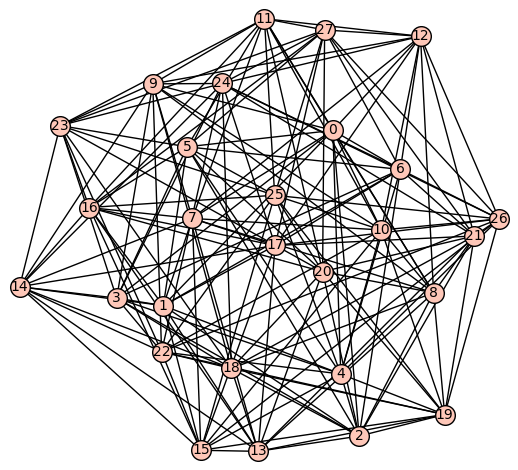

In [169]:
Graph(a1).plot()

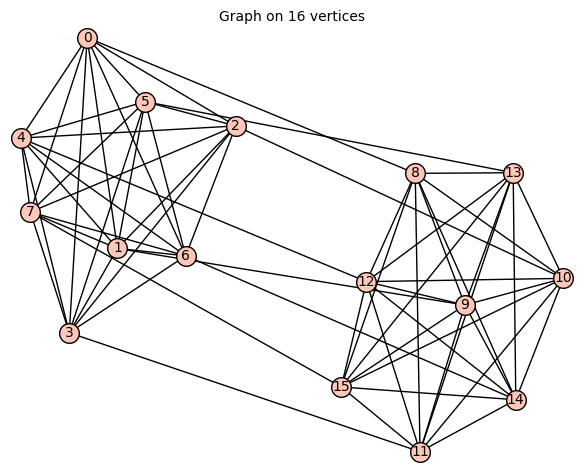

In [167]:
Graph(a2)

In [176]:
graph.get_adjacency_matrix()

[0 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
[1 0 1 1 1 1 0 0 0 1 1 1 0 0 0]
[1 1 0 1 1 0 1 0 0 1 0 0 1 1 0]
[1 1 1 0 1 0 0 1 0 0 1 0 1 0 1]
[1 1 1 1 0 0 0 0 1 0 0 1 0 1 1]
[1 1 0 0 0 0 1 1 1 1 1 1 0 0 0]
[1 0 1 0 0 1 0 1 1 1 0 0 1 1 0]
[1 0 0 1 0 1 1 0 1 0 1 0 1 0 1]
[1 0 0 0 1 1 1 1 0 0 0 1 0 1 1]
[0 1 1 0 0 1 1 0 0 0 1 1 1 1 0]
[0 1 0 1 0 1 0 1 0 1 0 1 1 0 1]
[0 1 0 0 1 1 0 0 1 1 1 0 0 1 1]
[0 0 1 1 0 0 1 1 0 1 1 0 0 1 1]
[0 0 1 0 1 0 1 0 1 1 0 1 1 0 1]
[0 0 0 1 1 0 0 1 1 0 1 1 1 1 0]

In [149]:
o = graphs.CompleteGraph(8).line_graph()
o.is_strongly_regular()

True

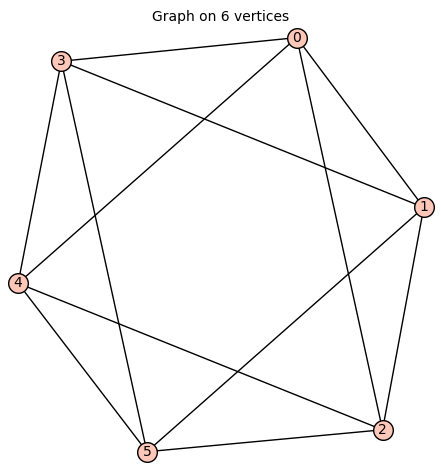

In [125]:
Graph(a1)

In [210]:
adj = a1

count = {
    "neighbour": 0,
    "non-neighbour": 0
}

neighbour_idx, non_neighbour_idx = -1,-1
for j in range(1,len(adj[0])):
    if neighbour_idx == -1 and adj[0][j] == 1:
        neighbour_idx = j
    if non_neighbour_idx == -1 and adj[0][j] == 0:
        non_neighbour_idx = j
        
for j in range(len(adj[0])):
    if adj[0][j] == 1 and adj[non_neighbour_idx][j] == 1:
        count['non-neighbour'] += 1
    if adj[0][j] == 1 and adj[neighbour_idx][j] == 1:
        count['neighbour'] += 1


print(count)
print(adj.nrows())
print(sum(adj[0]))

{'neighbour': 4, 'non-neighbour': 4}
15
8


$srg\left(\cfrac{n(n – 1)}{2}, 2(n – 2), n – 2, 4\right)$

So $T(n)$ will have the above vertices, but after deletion we can decompose it to:
- A1: Type-3 $ \begin{pmatrix} n-2 \\ 2\end{pmatrix}$ vertices (need to find out the structure), maybe just show the equation of $\text{A1}^2$
- A2: Type-4 graph of $R_{2,n-2}$ Rook Graph, known since the neighbourhood is a rook's graph (search wiki johnson graph since $T(n)\cong J(n,2)$ 
- C: Type-2 (by weisfeiler)

Cool thing: 
$$
\sum_{k=1}^{n} k = \begin{pmatrix}n+1 \\ 2\end{pmatrix}
$$
So A1 will consist of $k \in \{n-3, n-4, \ldots, 2, 1\}$ of $(J-I)_k$ along the diagonal.
For each block on decreasing size on the off-diagonals, we have a row of 1s, then $I_k$ below it.

i.e. for $n=6$,

$$
\begin{bmatrix}
0 & 1 & 1 & 1 & 1 & 0 \\
1 & 0 & 1 & 1 & 0 & 1 \\
1 & 1 & 0 & 0 & 1 & 1 \\
1 & 1 & 0 & 0 & 1 & 1 \\
1 & 0 & 1 & 1 & 0 & 1 \\
0 & 1 & 0 & 1 & 1 & 0
\end{bmatrix}
$$

$$
\begin{bmatrix}
(J-I)_3 & B_{3,2} & B_{3,1}\\
B_{3,2}^T & (J-I)_2 & B_{2,1}\\
B_{3,1}^T & B_{2,1}^T & (J-I)_1 \\
\end{bmatrix}
$$

We define $B_{i, j}, \quad i > j$ as such:

$$
\begin{align*}
B_{i,j} &=
\begin{bmatrix}
    0 & 0 & 0 & \ldots & 0 \\
    1 & 1 & 1 & \ldots & 1 \\
    1 & 0 & 0 & \ldots & 0 \\
    0 & 1 & 0 & \ldots & 0 \\
    0 & 0 & 1 & \ldots & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \ldots & 1 \\
\end{bmatrix} 
&= 
\begin{bmatrix}
0_{i-(j+1),j} \\ 
1_{1,j} \\
I_{j}
\end{bmatrix}
\end{align*}
$$

We want to show that $A1$ will follow the following formula:

$$
A^2 = kI + aA + c(J-I-A)
$$

where $A$ has strongly regular parameters $srg(v,k,a,c)$

a1

$$
n=4C2=6, a1=
\begin{bmatrix}
(J-I)_3 & B_{3,2} & B_{3,1}\\
B_{3,2}^T & (J-I)_2 & B_{2,1}\\
B_{3,1}^T & B_{2,1}^T & (J-I)_1 \\
\end{bmatrix}
$$

$$
n=5C2=10, a1=
\begin{bmatrix}
(J-I)_4 & B_{4,3} & B_{4,2} & B_{4,1} \\
B_{4,3}^T & (J-I)_3 & B_{3,2} & B_{3,1}\\
B_{4,2}^T & B_{3,2}^T & (J-I)_2 & B_{2,1}\\
B_{4,1}^T & B_{3,1}^T & B_{2,1}^T & (J-I)_1 \\
\end{bmatrix}
$$

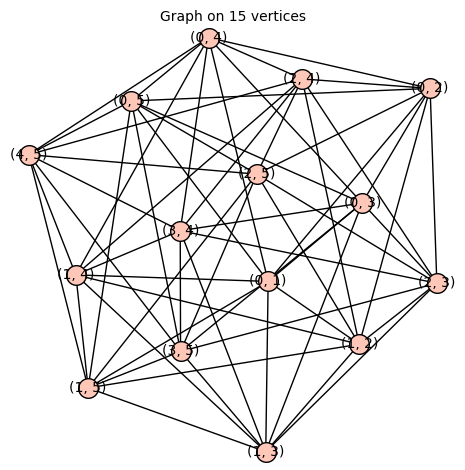

In [245]:
graphs.CompleteGraph(6).line_graph(labels=False)

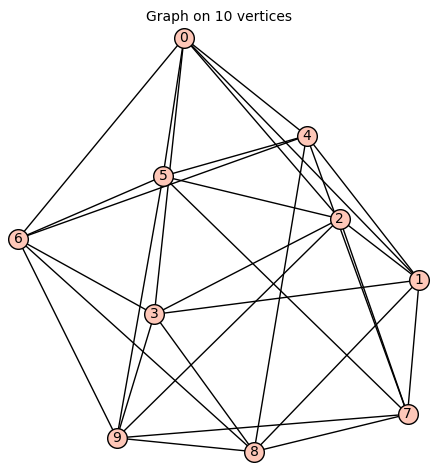

In [249]:
Graph(a1)

In [260]:
n = 6
print("=-="*30) 
print(f"Operations on T({n})")
graph = Triangle_Graph(n)

k=1
switched_graph = graph.delete_vertices([i for i in range(k)])
print(f"Switching {k} vertex")
print(switched_graph.get_coherent_rank())
print(switched_graph.get_type_matrix())

blocks = switched_graph.get_blocks()

a1 = blocks[0]
a2 = blocks[-1]
c = blocks[1]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on T(6)
Switching 1 vertex
rank 11
[3 2]
[2 4]


In [262]:
switched_graph.get_blocks()

[
                                  [1 1 1 0 0 0]  [0 1 1 1 1 0 0 0]
                                  [1 0 0 1 1 0]  [1 0 1 1 0 1 0 0]
[0 1 1 1 1 0]  [1 1 0 0 1 1 0 0]  [0 1 0 1 0 1]  [1 1 0 1 0 0 1 0]
[1 0 1 1 0 1]  [1 0 1 0 1 0 1 0]  [0 0 1 0 1 1]  [1 1 1 0 0 0 0 1]
[1 1 0 0 1 1]  [1 0 0 1 1 0 0 1]  [1 1 1 0 0 0]  [1 0 0 0 0 1 1 1]
[1 1 0 0 1 1]  [0 1 1 0 0 1 1 0]  [1 0 0 1 1 0]  [0 1 0 0 1 0 1 1]
[1 0 1 1 0 1]  [0 1 0 1 0 1 0 1]  [0 1 0 1 0 1]  [0 0 1 0 1 1 0 1]
[0 1 1 1 1 0], [0 0 1 1 0 0 1 1], [0 0 1 0 1 1], [0 0 0 1 1 1 1 0]
]

In [2]:
# for m in switched_graph.get_config_list():
#     print(Matrix(m))
#     print()
n=5
J = Matrix(
    [[1]* n]*n
)
res = []
for i in range(n):
    tmp = []
    for j in range(n):
        if i == j:
            tmp.append(1)
        else:
            tmp.append(0)
    res.append(tmp)
I = Matrix(res)

In [3]:
(J-I)**2

[4 3 3 3 3]
[3 4 3 3 3]
[3 3 4 3 3]
[3 3 3 4 3]
[3 3 3 3 4]

In [28]:
for n in range(4, 20, 2):
    print("=-="*30) 
    print(f"Operations on R({n, n})")
    graph = OA_Graph(2,n)
    
    k=n//2
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    print(f"Switching {k} vertex")
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())

blocks = switched_graph.get_blocks()

# a1 = blocks[0]
# a2 = blocks[-1]
# c = blocks[1]

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on R((4, 4))
Switching 2 vertex
rank 3
[3]
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on R((6, 6))
Switching 3 vertex
rank 6
[6]
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on R((8, 8))
Switching 4 vertex
rank 6
[6]
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on R((10, 10))
Switching 5 vertex
rank 6
[6]
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on R((12, 12))
Switching 6 vertex
rank 6
[6]
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on R((14, 14))
Switching 7 vertex
rank 6
[6]
=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on R((16, 16))
Switchi

In [26]:
A = switched_graph.get_adjacency_matrix()
print(A**2)

[26 20 20 20 20 20 20 18 18 18 18 18 10 12 12 12 12 12 10 12 12 12 12 12 10 12 12 12 12 12 10 12 12 12 12 12]
[20 26 20 20 20 20 18 20 18 18 18 18 12 10 12 12 12 12 12 10 12 12 12 12 12 10 12 12 12 12 12 10 12 12 12 12]
[20 20 26 20 20 20 18 18 20 18 18 18 12 12 10 12 12 12 12 12 10 12 12 12 12 12 10 12 12 12 12 12 10 12 12 12]
[20 20 20 26 20 20 18 18 18 20 18 18 12 12 12 10 12 12 12 12 12 10 12 12 12 12 12 10 12 12 12 12 12 10 12 12]
[20 20 20 20 26 20 18 18 18 18 20 18 12 12 12 12 10 12 12 12 12 12 10 12 12 12 12 12 10 12 12 12 12 12 10 12]
[20 20 20 20 20 26 18 18 18 18 18 20 12 12 12 12 12 10 12 12 12 12 12 10 12 12 12 12 12 10 12 12 12 12 12 10]
[20 18 18 18 18 18 26 20 20 20 20 20 10 12 12 12 12 12 10 12 12 12 12 12 10 12 12 12 12 12 10 12 12 12 12 12]
[18 20 18 18 18 18 20 26 20 20 20 20 12 10 12 12 12 12 12 10 12 12 12 12 12 10 12 12 12 12 12 10 12 12 12 12]
[18 18 20 18 18 18 20 20 26 20 20 20 12 12 10 12 12 12 12 12 10 12 12 12 12 12 10 12 12 12 12 12 10 12 12 12]
[18 18 18 

In [29]:
n=6
print("=-="*30) 
print(f"Operations on R({n, n})")
graph = OA_Graph(2,n)

k=n//2
switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
print(f"Switching {k} vertex")
print(switched_graph.get_coherent_rank())
print(switched_graph.get_type_matrix())

blocks = switched_graph.get_blocks()

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on R((6, 6))
Switching 3 vertex
rank 6
[6]


In [31]:
for i in switched_graph.get_config_list():
    print(Matrix(i))
    print("="*30)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0

In [32]:
n=8
print("=-="*30) 
print(f"Operations on R({n, n})")
graph = OA_Graph(2,n)

k=n//2
switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
print(f"Switching {k} vertex")
print(switched_graph.get_coherent_rank())
print(switched_graph.get_type_matrix())

blocks = switched_graph.get_blocks()

for i in switched_graph.get_config_list():
    print(Matrix(i))
    print("="*30)

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Operations on R((8, 8))
Switching 4 vertex
rank 6
[6]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [38]:
graph = Triangle_Graph(8)

switched_graph = graph.delete_vertex(0)
print(f"Switching {k} vertex")
print(switched_graph.get_coherent_rank())
print(switched_graph.get_type_matrix())

Switching 4 vertex
rank 11
[3 2]
[2 4]


In [39]:
print(switched_graph.get_adjacency_matrix())

[0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
[1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0]
[1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0]
[1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1]
[1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1]
[1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
[0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0]
[0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0]
[0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1]
[0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1]
[1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
[1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0]
[1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0]
[1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1]
[1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1]
[0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1

In [40]:
for i in switched_graph.get_blocks():
    print(Matrix(i))
    print("="*50)

[0 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
[1 0 1 1 1 1 0 0 0 1 1 1 0 0 0]
[1 1 0 1 1 0 1 0 0 1 0 0 1 1 0]
[1 1 1 0 1 0 0 1 0 0 1 0 1 0 1]
[1 1 1 1 0 0 0 0 1 0 0 1 0 1 1]
[1 1 0 0 0 0 1 1 1 1 1 1 0 0 0]
[1 0 1 0 0 1 0 1 1 1 0 0 1 1 0]
[1 0 0 1 0 1 1 0 1 0 1 0 1 0 1]
[1 0 0 0 1 1 1 1 0 0 0 1 0 1 1]
[0 1 1 0 0 1 1 0 0 0 1 1 1 1 0]
[0 1 0 1 0 1 0 1 0 1 0 1 1 0 1]
[0 1 0 0 1 1 0 0 1 1 1 0 0 1 1]
[0 0 1 1 0 0 1 1 0 1 1 0 0 1 1]
[0 0 1 0 1 0 1 0 1 1 0 1 1 0 1]
[0 0 0 1 1 0 0 1 1 0 1 1 1 1 0]
[1 1 0 0 0 0 1 1 0 0 0 0]
[1 0 1 0 0 0 1 0 1 0 0 0]
[1 0 0 1 0 0 1 0 0 1 0 0]
[1 0 0 0 1 0 1 0 0 0 1 0]
[1 0 0 0 0 1 1 0 0 0 0 1]
[0 1 1 0 0 0 0 1 1 0 0 0]
[0 1 0 1 0 0 0 1 0 1 0 0]
[0 1 0 0 1 0 0 1 0 0 1 0]
[0 1 0 0 0 1 0 1 0 0 0 1]
[0 0 1 1 0 0 0 0 1 1 0 0]
[0 0 1 0 1 0 0 0 1 0 1 0]
[0 0 1 0 0 1 0 0 1 0 0 1]
[0 0 0 1 1 0 0 0 0 1 1 0]
[0 0 0 1 0 1 0 0 0 1 0 1]
[0 0 0 0 1 1 0 0 0 0 1 1]
[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
[0 1 0 0 0 1 0 0 0 1 1 1 0 0 0]
[0 0 1 0 0 0 1 0 0 1 0 0 1 1 0]
[0

In [32]:
n=9
graph = Triangle_Graph(n)

deleted_graph = graph.delete_vertex(0)
deleted_graph.get_coherent_rank()

for i in deleted_graph.get_blocks():
    print(Matrix(i))
    print()

[0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
[1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0]
[1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0]
[1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1]
[1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1]
[1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
[1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0]
[1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0]
[1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1]
[1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1]
[0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0]
[0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0]
[0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1]
[0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1]
[0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0]
[0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1]
[0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1]
[0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1]
[0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1]
[0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0]

[1 1 0 0 0 0 0 1 1 0 0 0 0 0]
[1 0 1 0 0 0 0 1 0 1 0 0 0 0]
[1 0 0 1 0 0 0 

In [33]:
graph = Triangle_Graph(6)
graph.get_adjacency_matrix()

[0 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
[1 0 1 1 1 1 0 0 0 1 1 1 0 0 0]
[1 1 0 1 1 0 1 0 0 1 0 0 1 1 0]
[1 1 1 0 1 0 0 1 0 0 1 0 1 0 1]
[1 1 1 1 0 0 0 0 1 0 0 1 0 1 1]
[1 1 0 0 0 0 1 1 1 1 1 1 0 0 0]
[1 0 1 0 0 1 0 1 1 1 0 0 1 1 0]
[1 0 0 1 0 1 1 0 1 0 1 0 1 0 1]
[1 0 0 0 1 1 1 1 0 0 0 1 0 1 1]
[0 1 1 0 0 1 1 0 0 0 1 1 1 1 0]
[0 1 0 1 0 1 0 1 0 1 0 1 1 0 1]
[0 1 0 0 1 1 0 0 1 1 1 0 0 1 1]
[0 0 1 1 0 0 1 1 0 1 1 0 0 1 1]
[0 0 1 0 1 0 1 0 1 1 0 1 1 0 1]
[0 0 0 1 1 0 0 1 1 0 1 1 1 1 0]

In [1]:
from graph_models import *

In [110]:
graph = OA_Graph(2,5)
deleted_graph = graph.delete_vertex(0)

deleted_graph.get_coherent_rank()

'rank 10'

In [111]:
a1 = deleted_graph.get_blocks()[0]
a2 = deleted_graph.get_blocks()[-1]
c = deleted_graph.get_blocks()[1]
ct = deleted_graph.get_blocks()[2]

In [114]:
(matrix.ones(8,16) - c) * (matrix.ones(16,8) -ct)

[12  8  8  8  9  9  9  9]
[ 8 12  8  8  9  9  9  9]
[ 8  8 12  8  9  9  9  9]
[ 8  8  8 12  9  9  9  9]
[ 9  9  9  9 12  8  8  8]
[ 9  9  9  9  8 12  8  8]
[ 9  9  9  9  8  8 12  8]
[ 9  9  9  9  8  8  8 12]

In [118]:
(5-2)**2 * (matrix.ones(8)-matrix.identity(8)-a1) + (5-1)*(5-2)*matrix.identity(8) + (5-3)*(5-1)*a1

[12  8  8  8  9  9  9  9]
[ 8 12  8  8  9  9  9  9]
[ 8  8 12  8  9  9  9  9]
[ 8  8  8 12  9  9  9  9]
[ 9  9  9  9 12  8  8  8]
[ 9  9  9  9  8 12  8  8]
[ 9  9  9  9  8  8 12  8]
[ 9  9  9  9  8  8  8 12]

In [117]:
(5-2)**2 * (matrix.ones(8)) + 3*matrix.identity(8) - a1

[12  8  8  8  9  9  9  9]
[ 8 12  8  8  9  9  9  9]
[ 8  8 12  8  9  9  9  9]
[ 8  8  8 12  9  9  9  9]
[ 9  9  9  9 12  8  8  8]
[ 9  9  9  9  8 12  8  8]
[ 9  9  9  9  8  8 12  8]
[ 9  9  9  9  8  8  8 12]

In [23]:
a2*matrix.ones(16,8) -a2*ct

[3 5 5 5 3 5 5 5]
[5 3 5 5 3 5 5 5]
[5 5 3 5 3 5 5 5]
[5 5 5 3 3 5 5 5]
[3 5 5 5 5 3 5 5]
[5 3 5 5 5 3 5 5]
[5 5 3 5 5 3 5 5]
[5 5 5 3 5 3 5 5]
[3 5 5 5 5 5 3 5]
[5 3 5 5 5 5 3 5]
[5 5 3 5 5 5 3 5]
[5 5 5 3 5 5 3 5]
[3 5 5 5 5 5 5 3]
[5 3 5 5 5 5 5 3]
[5 5 3 5 5 5 5 3]
[5 5 5 3 5 5 5 3]

In [28]:
(2*5-5)*(matrix.ones(16,8)-ct) + (5-2)*ct

[3 5 5 5 3 5 5 5]
[5 3 5 5 3 5 5 5]
[5 5 3 5 3 5 5 5]
[5 5 5 3 3 5 5 5]
[3 5 5 5 5 3 5 5]
[5 3 5 5 5 3 5 5]
[5 5 3 5 5 3 5 5]
[5 5 5 3 5 3 5 5]
[3 5 5 5 5 5 3 5]
[5 3 5 5 5 5 3 5]
[5 5 3 5 5 5 3 5]
[5 5 5 3 5 5 3 5]
[3 5 5 5 5 5 5 3]
[5 3 5 5 5 5 5 3]
[5 5 3 5 5 5 5 3]
[5 5 5 3 5 5 5 3]

In [31]:
(matrix.ones(8) - matrix.identity(8) -a1)**2

[4 4 4 4 0 0 0 0]
[4 4 4 4 0 0 0 0]
[4 4 4 4 0 0 0 0]
[4 4 4 4 0 0 0 0]
[0 0 0 0 4 4 4 4]
[0 0 0 0 4 4 4 4]
[0 0 0 0 4 4 4 4]
[0 0 0 0 4 4 4 4]

In [37]:
(matrix.ones(8) - matrix.identity(8) -a1)*-4

[ 0  0  0  0 -4 -4 -4 -4]
[ 0  0  0  0 -4 -4 -4 -4]
[ 0  0  0  0 -4 -4 -4 -4]
[ 0  0  0  0 -4 -4 -4 -4]
[-4 -4 -4 -4  0  0  0  0]
[-4 -4 -4 -4  0  0  0  0]
[-4 -4 -4 -4  0  0  0  0]
[-4 -4 -4 -4  0  0  0  0]

In [39]:
test = matrix.ones(8) - matrix.identity(8) - a1

In [40]:
test*test

[4 4 4 4 0 0 0 0]
[4 4 4 4 0 0 0 0]
[4 4 4 4 0 0 0 0]
[4 4 4 4 0 0 0 0]
[0 0 0 0 4 4 4 4]
[0 0 0 0 4 4 4 4]
[0 0 0 0 4 4 4 4]
[0 0 0 0 4 4 4 4]

In [44]:
(matrix.identity(8) + a1 ) * (5-1)

[4 4 4 4 0 0 0 0]
[4 4 4 4 0 0 0 0]
[4 4 4 4 0 0 0 0]
[4 4 4 4 0 0 0 0]
[0 0 0 0 4 4 4 4]
[0 0 0 0 4 4 4 4]
[0 0 0 0 4 4 4 4]
[0 0 0 0 4 4 4 4]

In [46]:
(matrix.ones(8)-matrix.identity(8)-a1)*(matrix.ones(8,16)-c)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]

In [56]:
(matrix.ones(16)-matrix.identity(16)-a2) **2

[9 6 6 6 6 4 4 4 6 4 4 4 6 4 4 4]
[6 9 6 6 4 6 4 4 4 6 4 4 4 6 4 4]
[6 6 9 6 4 4 6 4 4 4 6 4 4 4 6 4]
[6 6 6 9 4 4 4 6 4 4 4 6 4 4 4 6]
[6 4 4 4 9 6 6 6 6 4 4 4 6 4 4 4]
[4 6 4 4 6 9 6 6 4 6 4 4 4 6 4 4]
[4 4 6 4 6 6 9 6 4 4 6 4 4 4 6 4]
[4 4 4 6 6 6 6 9 4 4 4 6 4 4 4 6]
[6 4 4 4 6 4 4 4 9 6 6 6 6 4 4 4]
[4 6 4 4 4 6 4 4 6 9 6 6 4 6 4 4]
[4 4 6 4 4 4 6 4 6 6 9 6 4 4 6 4]
[4 4 4 6 4 4 4 6 6 6 6 9 4 4 4 6]
[6 4 4 4 6 4 4 4 6 4 4 4 9 6 6 6]
[4 6 4 4 4 6 4 4 4 6 4 4 6 9 6 6]
[4 4 6 4 4 4 6 4 4 4 6 4 6 6 9 6]
[4 4 4 6 4 4 4 6 4 4 4 6 6 6 6 9]

In [57]:
(5-3)**2 * matrix.ones(16) + (5)*matrix.identity(16) + 2*a2

[9 6 6 6 6 4 4 4 6 4 4 4 6 4 4 4]
[6 9 6 6 4 6 4 4 4 6 4 4 4 6 4 4]
[6 6 9 6 4 4 6 4 4 4 6 4 4 4 6 4]
[6 6 6 9 4 4 4 6 4 4 4 6 4 4 4 6]
[6 4 4 4 9 6 6 6 6 4 4 4 6 4 4 4]
[4 6 4 4 6 9 6 6 4 6 4 4 4 6 4 4]
[4 4 6 4 6 6 9 6 4 4 6 4 4 4 6 4]
[4 4 4 6 6 6 6 9 4 4 4 6 4 4 4 6]
[6 4 4 4 6 4 4 4 9 6 6 6 6 4 4 4]
[4 6 4 4 4 6 4 4 6 9 6 6 4 6 4 4]
[4 4 6 4 4 4 6 4 6 6 9 6 4 4 6 4]
[4 4 4 6 4 4 4 6 6 6 6 9 4 4 4 6]
[6 4 4 4 6 4 4 4 6 4 4 4 9 6 6 6]
[4 6 4 4 4 6 4 4 4 6 4 4 6 9 6 6]
[4 4 6 4 4 4 6 4 4 4 6 4 6 6 9 6]
[4 4 4 6 4 4 4 6 4 4 4 6 6 6 6 9]

In [52]:
a2**2

[6 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 6 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 6 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 6 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 6 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 6 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 6 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 6 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 6 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 6 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 6 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 6 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 6 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 6 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6]

In [54]:
6*matrix.identity(16) + 2*a2 + 2*(matrix.ones(16)-matrix.identity(16)-a2)

[6 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 6 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 6 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 6 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 6 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 6 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 6 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 6 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 6 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 6 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 6 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 6 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 6 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 6 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6]

In [58]:
(matrix.ones(16)-matrix.identity(16)-a2)*(matrix.ones(16,8)-ct)

[9 6 6 6 9 6 6 6]
[6 9 6 6 9 6 6 6]
[6 6 9 6 9 6 6 6]
[6 6 6 9 9 6 6 6]
[9 6 6 6 6 9 6 6]
[6 9 6 6 6 9 6 6]
[6 6 9 6 6 9 6 6]
[6 6 6 9 6 9 6 6]
[9 6 6 6 6 6 9 6]
[6 9 6 6 6 6 9 6]
[6 6 9 6 6 6 9 6]
[6 6 6 9 6 6 9 6]
[9 6 6 6 6 6 6 9]
[6 9 6 6 6 6 6 9]
[6 6 9 6 6 6 6 9]
[6 6 6 9 6 6 6 9]

In [59]:
(25-25+6)*matrix.ones(16,8) + (5-2)*ct

[9 6 6 6 9 6 6 6]
[6 9 6 6 9 6 6 6]
[6 6 9 6 9 6 6 6]
[6 6 6 9 9 6 6 6]
[9 6 6 6 6 9 6 6]
[6 9 6 6 6 9 6 6]
[6 6 9 6 6 9 6 6]
[6 6 6 9 6 9 6 6]
[9 6 6 6 6 6 9 6]
[6 9 6 6 6 6 9 6]
[6 6 9 6 6 6 9 6]
[6 6 6 9 6 6 9 6]
[9 6 6 6 6 6 6 9]
[6 9 6 6 6 6 6 9]
[6 6 9 6 6 6 6 9]
[6 6 6 9 6 6 6 9]

In [60]:
c*a2 == (matrix.ones(8,16)  - c)+(5-3)*c

False

In [61]:
c*a2

[3 1 1 1 3 1 1 1 3 1 1 1 3 1 1 1]
[1 3 1 1 1 3 1 1 1 3 1 1 1 3 1 1]
[1 1 3 1 1 1 3 1 1 1 3 1 1 1 3 1]
[1 1 1 3 1 1 1 3 1 1 1 3 1 1 1 3]
[3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 3 3 3 3 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 3 3 3 3 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3]

In [63]:
(matrix.ones(8,16)  - c)+(5-2)*c

[3 1 1 1 3 1 1 1 3 1 1 1 3 1 1 1]
[1 3 1 1 1 3 1 1 1 3 1 1 1 3 1 1]
[1 1 3 1 1 1 3 1 1 1 3 1 1 1 3 1]
[1 1 1 3 1 1 1 3 1 1 1 3 1 1 1 3]
[3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 3 3 3 3 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 3 3 3 3 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3]

In [64]:
(matrix.ones(8,16)  - c)*(matrix.ones(16)-matrix.identity(16)-a2)

[9 6 6 6 9 6 6 6 9 6 6 6 9 6 6 6]
[6 9 6 6 6 9 6 6 6 9 6 6 6 9 6 6]
[6 6 9 6 6 6 9 6 6 6 9 6 6 6 9 6]
[6 6 6 9 6 6 6 9 6 6 6 9 6 6 6 9]
[9 9 9 9 6 6 6 6 6 6 6 6 6 6 6 6]
[6 6 6 6 9 9 9 9 6 6 6 6 6 6 6 6]
[6 6 6 6 6 6 6 6 9 9 9 9 6 6 6 6]
[6 6 6 6 6 6 6 6 6 6 6 6 9 9 9 9]

In [67]:
6*matrix.ones(8,16)+3*c

[9 6 6 6 9 6 6 6 9 6 6 6 9 6 6 6]
[6 9 6 6 6 9 6 6 6 9 6 6 6 9 6 6]
[6 6 9 6 6 6 9 6 6 6 9 6 6 6 9 6]
[6 6 6 9 6 6 6 9 6 6 6 9 6 6 6 9]
[9 9 9 9 6 6 6 6 6 6 6 6 6 6 6 6]
[6 6 6 6 9 9 9 9 6 6 6 6 6 6 6 6]
[6 6 6 6 6 6 6 6 9 9 9 9 6 6 6 6]
[6 6 6 6 6 6 6 6 6 6 6 6 9 9 9 9]

In [68]:
(matrix.ones(8,16)-c)*(matrix.ones(16,8)-ct)

[12  8  8  8  9  9  9  9]
[ 8 12  8  8  9  9  9  9]
[ 8  8 12  8  9  9  9  9]
[ 8  8  8 12  9  9  9  9]
[ 9  9  9  9 12  8  8  8]
[ 9  9  9  9  8 12  8  8]
[ 9  9  9  9  8  8 12  8]
[ 9  9  9  9  8  8  8 12]

In [82]:
((5-2)**2)*matrix.ones(8)+(5-2)*matrix.identity(8) - a1 == (matrix.ones(8,16)-c)*(matrix.ones(16,8)-ct)

True

In [85]:
(5-1)*matrix.identity(8) + (matrix.ones(8)-matrix.identity(8)-a1) == c*ct

True

In [88]:
matrix.ones(8,16)*ct - c*ct == (5-2)*(matrix.ones(8)-matrix.identity(8)-a1) + (5-1)*a1

True

In [129]:
for n in range(1,30):
    try:
        graph = FYP_Graph(graphs.PaleyGraph(n)).switch_graph(0)
        print(f"n:{n}, rank:{graph.get_coherent_rank()}")
        print(graph.get_type_matrix())
        print()
    except:
        pass
# for i in graph.get_config_list():
#     print(Matrix(i))
#     print()

n:5, rank:rank 13
[1 1 1]
[1 2 2]
[1 2 2]

n:9, rank:rank 15
[1 1 1]
[1 3 2]
[1 2 3]

n:13, rank:rank 29
[1 1 1]
[1 6 6]
[1 6 6]

n:17, rank:rank 37
[1 1 1]
[1 8 8]
[1 8 8]

n:25, rank:rank 33
[1 1 1]
[1 8 6]
[1 6 8]

n:29, rank:rank 61
[ 1  1  1]
[ 1 14 14]
[ 1 14 14]

